Task 3: Pre-trained state-of-the-art architecture
- development of a classification model for discriminating between 2 classes: fruits and vegetables.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import timeit
import datetime
import numpy as np
import random as rn
from PIL import Image
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.python.framework import ops
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from keras.regularizers import l2, l1
from sklearn import metrics
from sklearn.metrics import roc_curve


os.environ["PYTHONHASHSEED"]="0"
np.random.seed(123)
rn.seed(123)
tf.random.set_seed(123)


#magic command for enabling tensorflow 1.x
#%tensorflow_version 1.x 

# print tensorflow and keras versions
print(tf.__version__)
print(keras.__version__)

2.7.0
2.7.0


In [ ]:
# Tensorflow is already installed in Colab
# check if tensorflow is installed
import tensorflow as tf
print(tf.__version__) 
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print('you must enable GPU! Go to:')
  print('\nRuntime')
  print('\tChange runtime type')
  print('\t\tHardware Accelerator: GPU')

  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

2.7.0
Found GPU at: /device:GPU:0


In [ ]:
IMAGE_HEIGHT = 224 
IMAGE_WIDTH = 224 
BATCH_SIZE = 32
PATH_HOME = '/content/drive/Shareddrives/CIDL/'
PATH_DATASET_PREPROCESSED_BINARY = '/content/drive/Shareddrives/CIDL/dataset/preprocessed_binary'



In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal"), 
    layers.RandomRotation(0.2), 
    layers.RandomTranslation(height_factor=0.1, width_factor=0.1, fill_mode="constant", fill_value=255),
    layers.RandomZoom(0.1, fill_mode="nearest") 
  ]
)

In [ ]:
def conversion_batch_to_narray(dataset):
  lista = np.array([])
  labels_set = np.array([])
  i=0
  for elem,elem2 in dataset.as_numpy_iterator():
    print(elem.shape)
    if(i==0):
      lista = elem
    else:
      lista =  np.append(lista,elem,axis=0)
    i=i+1
    labels_set = np.append(labels_set,elem2,axis=0)
    print(lista.shape)
    print(i)
    if(i==-1):
      break
  return lista, labels_set


In [ ]:
def plotRocCurves(models, test, labels, names):
  for i in range(len(models)):
    probs = models[i].predict(test)
    preds = probs[:,0]
    fpr, tpr, threshold = metrics.roc_curve(labels, preds)
    roc_auc = metrics.auc(fpr, tpr)

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Roc curves')
    plt.plot(fpr, tpr, 'b', color=(np.random.rand(),np.random.rand(),np.random.rand()), label = names[i] + '= %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
  plt.show()

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

dataset_preprocessed_binary = image_dataset_from_directory(
    os.path.join(PATH_DATASET_PREPROCESSED_BINARY, ''),
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE,
    label_mode="binary")


Found 3469 files belonging to 2 classes.


In [ ]:
training_preprocessed_binary =image_dataset_from_directory(
    PATH_DATASET_PREPROCESSED_BINARY,
    validation_split=0.1,
    subset= "training",
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    seed = 123,
    batch_size=BATCH_SIZE)



Found 3469 files belonging to 2 classes.
Using 3123 files for training.


In [ ]:
test_preprocessed_binary =image_dataset_from_directory(
    PATH_DATASET_PREPROCESSED_BINARY,
    validation_split=0.1,
    subset= "validation",
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    seed = 123,
    batch_size=BATCH_SIZE)


Found 3469 files belonging to 2 classes.
Using 346 files for validation.


In [ ]:
training_set,labels_set = conversion_batch_to_narray(training_preprocessed_binary)

(32, 224, 224, 3)
(32, 224, 224, 3)
1
(32, 224, 224, 3)
(64, 224, 224, 3)
2
(32, 224, 224, 3)
(96, 224, 224, 3)
3
(32, 224, 224, 3)
(128, 224, 224, 3)
4
(32, 224, 224, 3)
(160, 224, 224, 3)
5
(32, 224, 224, 3)
(192, 224, 224, 3)
6
(32, 224, 224, 3)
(224, 224, 224, 3)
7
(32, 224, 224, 3)
(256, 224, 224, 3)
8
(32, 224, 224, 3)
(288, 224, 224, 3)
9
(32, 224, 224, 3)
(320, 224, 224, 3)
10
(32, 224, 224, 3)
(352, 224, 224, 3)
11
(32, 224, 224, 3)
(384, 224, 224, 3)
12
(32, 224, 224, 3)
(416, 224, 224, 3)
13
(32, 224, 224, 3)
(448, 224, 224, 3)
14
(32, 224, 224, 3)
(480, 224, 224, 3)
15
(32, 224, 224, 3)
(512, 224, 224, 3)
16
(32, 224, 224, 3)
(544, 224, 224, 3)
17
(32, 224, 224, 3)
(576, 224, 224, 3)
18
(32, 224, 224, 3)
(608, 224, 224, 3)
19
(32, 224, 224, 3)
(640, 224, 224, 3)
20
(32, 224, 224, 3)
(672, 224, 224, 3)
21
(32, 224, 224, 3)
(704, 224, 224, 3)
22
(32, 224, 224, 3)
(736, 224, 224, 3)
23
(32, 224, 224, 3)
(768, 224, 224, 3)
24
(32, 224, 224, 3)
(800, 224, 224, 3)
25
(32, 224, 22

In [ ]:
test_set, test_labels = conversion_batch_to_narray(test_preprocessed_binary)

(32, 224, 224, 3)
(32, 224, 224, 3)
1
(32, 224, 224, 3)
(64, 224, 224, 3)
2
(32, 224, 224, 3)
(96, 224, 224, 3)
3
(32, 224, 224, 3)
(128, 224, 224, 3)
4
(32, 224, 224, 3)
(160, 224, 224, 3)
5
(32, 224, 224, 3)
(192, 224, 224, 3)
6
(32, 224, 224, 3)
(224, 224, 224, 3)
7
(32, 224, 224, 3)
(256, 224, 224, 3)
8
(32, 224, 224, 3)
(288, 224, 224, 3)
9
(32, 224, 224, 3)
(320, 224, 224, 3)
10
(26, 224, 224, 3)
(346, 224, 224, 3)
11


#Training

##VGG16


In [ ]:
from tensorflow.keras.applications import VGG16

conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3))

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

###Model_1_Base

####Feature Extraction


In [ ]:
conv_base.trainable = False

In [ ]:
np.random.seed(123)
rn.seed(123)
tf.random.set_seed(123)

inputs = keras.Input(shape=(224, 224, 3))
x = keras.applications.vgg16.preprocess_input(inputs)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_1_VGG16 = keras.Model(inputs, outputs)
model_1_VGG16.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
dir_name = PATH_HOME + "/models"
if not os.path.exists(dir_name):
  os.makedirs(dir_name)
save_path = os.path.join(dir_name,' BinaryClassifier_Model1_VGG16_feature_extraction.h5')
callbacks_list = [
                  keras.callbacks.ModelCheckpoint(
                      filepath=save_path,
                      monitor="val_loss",
                      verbose=1,
                      save_best_only=True)

                  ]
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10)

In [ ]:
history = model_1_VGG16.fit(
      training_set,
      labels_set,
      epochs=50, 
      callbacks = [earlyStopping, callbacks_list],
      batch_size = BATCH_SIZE,
      validation_split = 0.1
)

Epoch 1/50
88/88 [==============================] - ETA: 0s - loss: 46.2267 - accuracy: 0.8804
Epoch 00001: val_loss improved from inf to 8.28093, saving model to /content/drive/Shareddrives/CIDL//models/ BinaryClassifier_Model1_VGG16_feature_extraction.h5
88/88 [==============================] - 61s 474ms/step - loss: 46.2267 - accuracy: 0.8804 - val_loss: 8.2809 - val_accuracy: 0.9393
Epoch 2/50
88/88 [==============================] - ETA: 0s - loss: 4.5153 - accuracy: 0.9605
Epoch 00002: val_loss improved from 8.28093 to 4.11232, saving model to /content/drive/Shareddrives/CIDL//models/ BinaryClassifier_Model1_VGG16_feature_extraction.h5
88/88 [==============================] - 25s 288ms/step - loss: 4.5153 - accuracy: 0.9605 - val_loss: 4.1123 - val_accuracy: 0.9393
Epoch 3/50
88/88 [==============================] - ETA: 0s - loss: 1.3592 - accuracy: 0.9701
Epoch 00003: val_loss improved from 4.11232 to 2.17447, saving model to /content/drive/Shareddrives/CIDL//models/ BinaryClas

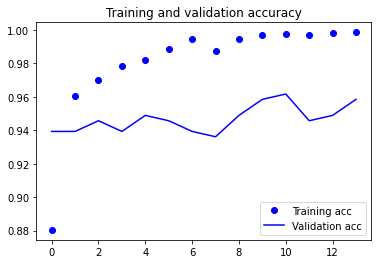

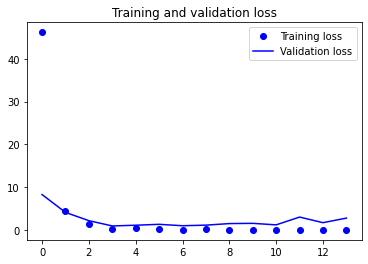

In [ ]:
import matplotlib.pyplot as plt

acc_1 = history.history['accuracy']
val_acc_1 = history.history['val_accuracy']
loss_1 = history.history['loss']
val_loss_1 = history.history['val_loss']

epochs = range(len(acc_1))

plt.plot(epochs, acc_1, 'bo', label='Training acc')
plt.plot(epochs, val_acc_1, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss_1, 'bo', label='Training loss')
plt.plot(epochs, val_loss_1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model_1_VGG16.evaluate(test_set, test_labels)
test_acc

11/11 [==============================] - 3s 239ms/step - loss: 7.5107 - accuracy: 0.9249


0.9248554706573486

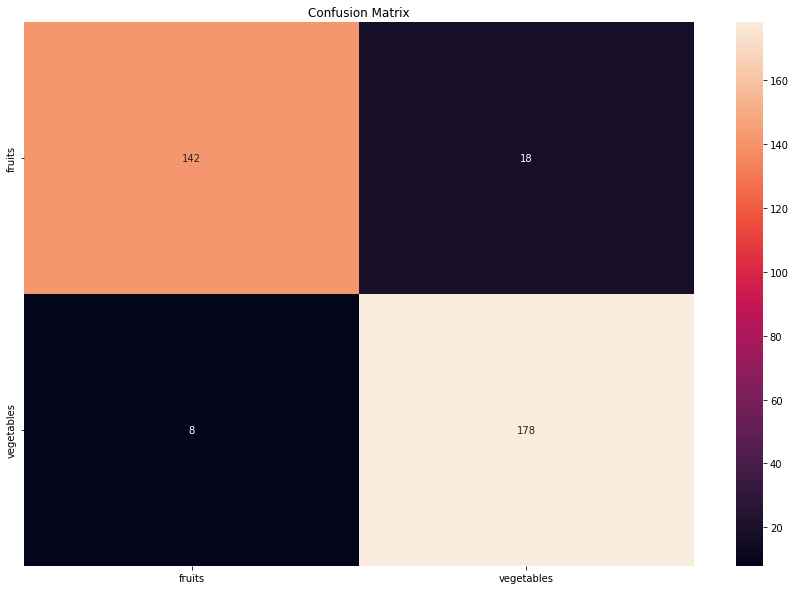

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

labels=os.listdir(PATH_DATASET_PREPROCESSED_BINARY)
labels = sorted(set(labels))

# Predict the label of the test_images
pred = model_1_VGG16.predict(test_set)
#pred = np.argmax(pred,axis=1)
pred[pred <= 0.5] = 0
pred[pred > 0.5] = 1
pred = pred[:,0]

cf_matrix = confusion_matrix(test_labels, pred, normalize=None)
plt.figure(figsize = (15,10))
sns.heatmap(cf_matrix, 
            annot=True, 
            xticklabels = sorted(set(labels)), 
            yticklabels = sorted(set(labels)),
            fmt = "d"
            )

plt.title('Confusion Matrix')
plt.show()

####Fine-Tuning

In [ ]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
dir_name = PATH_HOME + "/models"
if not os.path.exists(dir_name):
  os.makedirs(dir_name)
save_path = os.path.join(dir_name,'BinaryClassifier_Model1_VGG16_Fine_tuning.h5')
callbacks_list = [
                  keras.callbacks.ModelCheckpoint(
                      filepath=save_path,
                      monitor="val_loss",
                      verbose=1,
                      save_best_only=True)

                  ]
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10)

In [ ]:
history = model_1_VGG16.fit(
      training_set,
      labels_set,
      epochs=50, 
      callbacks = [earlyStopping, callbacks_list],
      batch_size = BATCH_SIZE,
      validation_split = 0.1
)

Epoch 1/50
88/88 [==============================] - ETA: 0s - loss: 0.0144 - accuracy: 0.9986
Epoch 00001: val_loss improved from inf to 4.28756, saving model to /content/drive/Shareddrives/CIDL//models/BinaryClassifier_Model1_VGG16_Fine_tuning.h5
88/88 [==============================] - 24s 273ms/step - loss: 0.0144 - accuracy: 0.9986 - val_loss: 4.2876 - val_accuracy: 0.9393
Epoch 2/50
88/88 [==============================] - ETA: 0s - loss: 0.0266 - accuracy: 0.9993
Epoch 00002: val_loss improved from 4.28756 to 2.61409, saving model to /content/drive/Shareddrives/CIDL//models/BinaryClassifier_Model1_VGG16_Fine_tuning.h5
88/88 [==============================] - 25s 283ms/step - loss: 0.0266 - accuracy: 0.9993 - val_loss: 2.6141 - val_accuracy: 0.9617
Epoch 3/50
88/88 [==============================] - ETA: 0s - loss: 0.0154 - accuracy: 0.9996
Epoch 00003: val_loss did not improve from 2.61409
88/88 [==============================] - 24s 269ms/step - loss: 0.0154 - accuracy: 0.9996 -

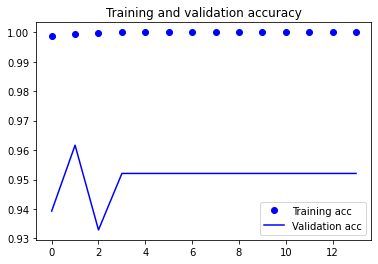

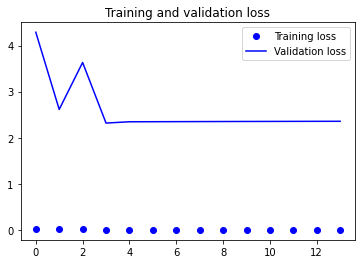

In [ ]:
import matplotlib.pyplot as plt

acc_1 = history.history['accuracy']
val_acc_1 = history.history['val_accuracy']
loss_1 = history.history['loss']
val_loss_1 = history.history['val_loss']

epochs = range(len(acc_1))

plt.plot(epochs, acc_1, 'bo', label='Training acc')
plt.plot(epochs, val_acc_1, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss_1, 'bo', label='Training loss')
plt.plot(epochs, val_loss_1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model_1_VGG16.evaluate(test_set, test_labels)
test_acc

11/11 [==============================] - 3s 239ms/step - loss: 5.9875 - accuracy: 0.9277


0.9277456402778625

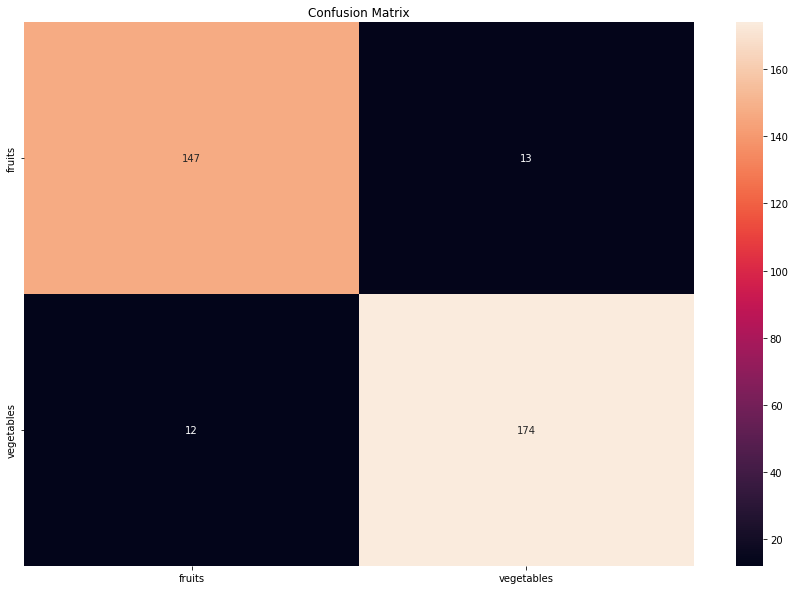

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

labels=os.listdir(PATH_DATASET_PREPROCESSED_BINARY)
labels = sorted(set(labels))

# Predict the label of the test_images
pred = model_1_VGG16.predict(test_set)
#pred = np.argmax(pred,axis=1)
pred[pred <= 0.5] = 0
pred[pred > 0.5] = 1
pred = pred[:,0]

cf_matrix = confusion_matrix(test_labels, pred, normalize=None)
plt.figure(figsize = (15,10))
sns.heatmap(cf_matrix, 
            annot=True, 
            xticklabels = sorted(set(labels)), 
            yticklabels = sorted(set(labels)),
            fmt = "d"
            )

plt.title('Confusion Matrix')
plt.show()

###Model_2_Aug

####Feature Extraction


In [ ]:
conv_base.trainable = False

In [ ]:
np.random.seed(123)
rn.seed(123)
tf.random.set_seed(123)

inputs = keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2_VGG16 = keras.Model(inputs, outputs)
model_2_VGG16.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
dir_name = PATH_HOME + "/models"
if not os.path.exists(dir_name):
  os.makedirs(dir_name)
save_path = os.path.join(dir_name,'BinaryClassifier_Model2_VGG16_feature_extraction.h5')
callbacks_list = [
                  keras.callbacks.ModelCheckpoint(
                      filepath=save_path,
                      monitor="val_loss",
                      verbose=1,
                      save_best_only=True)

                  ]
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10)

In [ ]:
history = model_2_VGG16.fit(
      training_set,
      labels_set,
      epochs=50, 
      callbacks = [earlyStopping, callbacks_list],
      batch_size = BATCH_SIZE,
      validation_split = 0.1
)

Epoch 1/50
88/88 [==============================] - ETA: 0s - loss: 32.4481 - accuracy: 0.8395
Epoch 00001: val_loss improved from inf to 8.52081, saving model to /content/drive/Shareddrives/CIDL//models/BinaryClassifier_Model2_VGG16_feature_extraction.h5
88/88 [==============================] - 27s 287ms/step - loss: 32.4481 - accuracy: 0.8395 - val_loss: 8.5208 - val_accuracy: 0.9329
Epoch 2/50
88/88 [==============================] - ETA: 0s - loss: 4.7488 - accuracy: 0.9057
Epoch 00002: val_loss improved from 8.52081 to 2.42454, saving model to /content/drive/Shareddrives/CIDL//models/BinaryClassifier_Model2_VGG16_feature_extraction.h5
88/88 [==============================] - 26s 292ms/step - loss: 4.7488 - accuracy: 0.9057 - val_loss: 2.4245 - val_accuracy: 0.9169
Epoch 3/50
88/88 [==============================] - ETA: 0s - loss: 0.7037 - accuracy: 0.9089
Epoch 00003: val_loss improved from 2.42454 to 0.43056, saving model to /content/drive/Shareddrives/CIDL//models/BinaryClassif

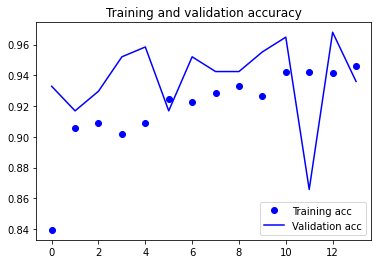

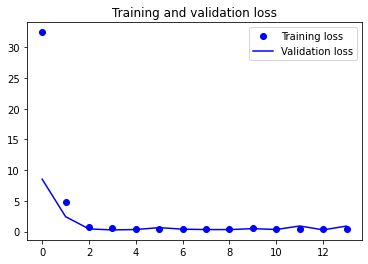

In [ ]:
import matplotlib.pyplot as plt

acc_1 = history.history['accuracy']
val_acc_1 = history.history['val_accuracy']
loss_1 = history.history['loss']
val_loss_1 = history.history['val_loss']

epochs = range(len(acc_1))

plt.plot(epochs, acc_1, 'bo', label='Training acc')
plt.plot(epochs, val_acc_1, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss_1, 'bo', label='Training loss')
plt.plot(epochs, val_loss_1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model_2_VGG16.evaluate(test_set, test_labels)
test_acc

11/11 [==============================] - 3s 238ms/step - loss: 0.8038 - accuracy: 0.9220


0.9219653010368347

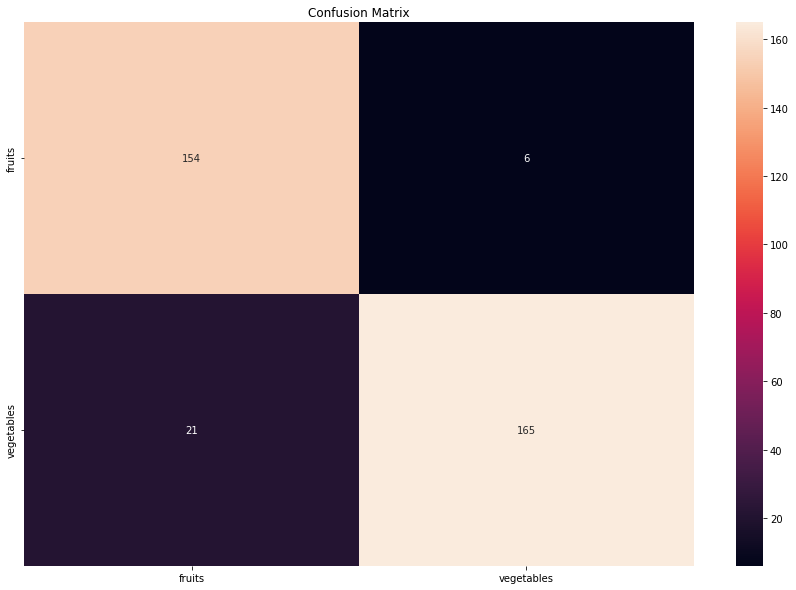

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

labels=os.listdir(PATH_DATASET_PREPROCESSED_BINARY)
labels = sorted(set(labels))

# Predict the label of the test_images
pred = model_2_VGG16.predict(test_set)
#pred = np.argmax(pred,axis=1)
pred[pred <= 0.5] = 0
pred[pred > 0.5] = 1
pred = pred[:,0]

cf_matrix = confusion_matrix(test_labels, pred, normalize=None)
plt.figure(figsize = (15,10))
sns.heatmap(cf_matrix, 
            annot=True, 
            xticklabels = sorted(set(labels)), 
            yticklabels = sorted(set(labels)),
            fmt = "d"
            )

plt.title('Confusion Matrix')
plt.show()

####Fine-Tuning

In [ ]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
dir_name = PATH_HOME + "/models"
if not os.path.exists(dir_name):
  os.makedirs(dir_name)
save_path = os.path.join(dir_name,'BinaryClassifier_Model2_VGG16_Fine_tuning.h5')
callbacks_list = [
                  keras.callbacks.ModelCheckpoint(
                      filepath=save_path,
                      monitor="val_loss",
                      verbose=1,
                      save_best_only=True)

                  ]
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10)

In [ ]:
history = model_2_VGG16.fit(
      training_set,
      labels_set,
      epochs=50, 
      callbacks = [earlyStopping, callbacks_list],
      batch_size = BATCH_SIZE,
      validation_split = 0.1
)

Epoch 1/50
88/88 [==============================] - ETA: 0s - loss: 0.3925 - accuracy: 0.9413
Epoch 00001: val_loss improved from inf to 0.88324, saving model to /content/drive/Shareddrives/CIDL//models/BinaryClassifier_Model2_VGG16_Fine_tuning.h5
88/88 [==============================] - 25s 288ms/step - loss: 0.3925 - accuracy: 0.9413 - val_loss: 0.8832 - val_accuracy: 0.9329
Epoch 2/50
88/88 [==============================] - ETA: 0s - loss: 0.4115 - accuracy: 0.9470
Epoch 00002: val_loss improved from 0.88324 to 0.54440, saving model to /content/drive/Shareddrives/CIDL//models/BinaryClassifier_Model2_VGG16_Fine_tuning.h5
88/88 [==============================] - 26s 297ms/step - loss: 0.4115 - accuracy: 0.9470 - val_loss: 0.5444 - val_accuracy: 0.9521
Epoch 3/50
88/88 [==============================] - ETA: 0s - loss: 0.3433 - accuracy: 0.9559
Epoch 00003: val_loss did not improve from 0.54440
88/88 [==============================] - 25s 281ms/step - loss: 0.3433 - accuracy: 0.9559 -

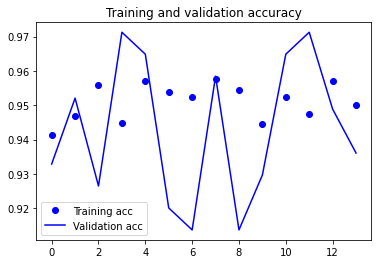

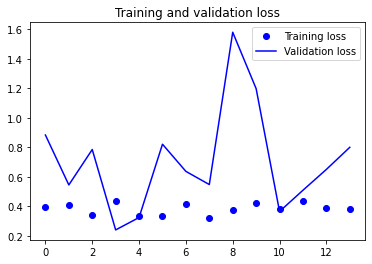

In [ ]:
import matplotlib.pyplot as plt

acc_1 = history.history['accuracy']
val_acc_1 = history.history['val_accuracy']
loss_1 = history.history['loss']
val_loss_1 = history.history['val_loss']

epochs = range(len(acc_1))

plt.plot(epochs, acc_1, 'bo', label='Training acc')
plt.plot(epochs, val_acc_1, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss_1, 'bo', label='Training loss')
plt.plot(epochs, val_loss_1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model_2_VGG16.evaluate(test_set, test_labels)
test_acc

11/11 [==============================] - 3s 239ms/step - loss: 1.4296 - accuracy: 0.9249


0.9248554706573486

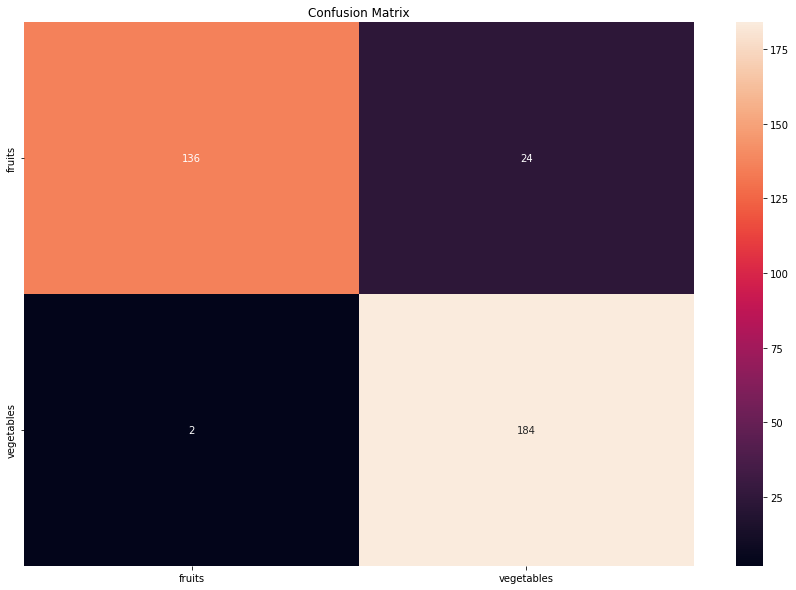

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

labels=os.listdir(PATH_DATASET_PREPROCESSED_BINARY)
labels = sorted(set(labels))

# Predict the label of the test_images
pred = model_2_VGG16.predict(test_set)
#pred = np.argmax(pred,axis=1)
pred[pred <= 0.5] = 0
pred[pred > 0.5] = 1
pred = pred[:,0]

cf_matrix = confusion_matrix(test_labels, pred, normalize=None)
plt.figure(figsize = (15,10))
sns.heatmap(cf_matrix, 
            annot=True, 
            xticklabels = sorted(set(labels)), 
            yticklabels = sorted(set(labels)),
            fmt = "d"
            )

plt.title('Confusion Matrix')
plt.show()

###Model_3a_Drop0.2

####Feature Extraction


In [ ]:
conv_base.trainable = False

In [ ]:
np.random.seed(123)
rn.seed(123)
tf.random.set_seed(123)

inputs = keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3a_VGG16 = keras.Model(inputs, outputs)
model_3a_VGG16.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
dir_name = PATH_HOME + "/models"
if not os.path.exists(dir_name):
  os.makedirs(dir_name)
save_path = os.path.join(dir_name,'BinaryClassifier_Model3a_VGG16_feature_extraction.h5')
callbacks_list = [
                  keras.callbacks.ModelCheckpoint(
                      filepath=save_path,
                      monitor="val_loss",
                      verbose=1,
                      save_best_only=True)

                  ]
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10)

In [ ]:
history = model_3a_VGG16.fit(
      training_set,
      labels_set,
      epochs=50, 
      callbacks = [earlyStopping, callbacks_list],
      batch_size = BATCH_SIZE,
      validation_split = 0.1
)

Epoch 1/50
88/88 [==============================] - ETA: 0s - loss: 33.6644 - accuracy: 0.8427
Epoch 00001: val_loss improved from inf to 13.47435, saving model to /content/drive/Shareddrives/CIDL//models/BinaryClassifier_Model3a_VGG16_feature_extraction.h5
88/88 [==============================] - 28s 292ms/step - loss: 33.6644 - accuracy: 0.8427 - val_loss: 13.4743 - val_accuracy: 0.9361
Epoch 2/50
88/88 [==============================] - ETA: 0s - loss: 12.6539 - accuracy: 0.8961
Epoch 00002: val_loss did not improve from 13.47435
88/88 [==============================] - 25s 282ms/step - loss: 12.6539 - accuracy: 0.8961 - val_loss: 15.8663 - val_accuracy: 0.8978
Epoch 3/50
88/88 [==============================] - ETA: 0s - loss: 7.1037 - accuracy: 0.9110
Epoch 00003: val_loss improved from 13.47435 to 2.29349, saving model to /content/drive/Shareddrives/CIDL//models/BinaryClassifier_Model3a_VGG16_feature_extraction.h5
88/88 [==============================] - 26s 297ms/step - loss: 7.

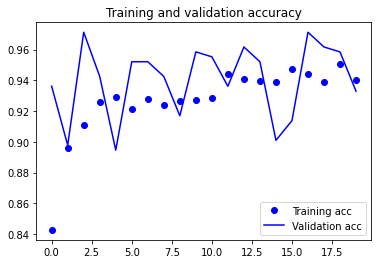

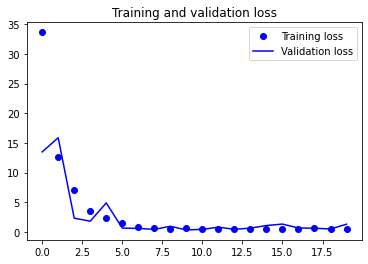

In [ ]:
import matplotlib.pyplot as plt

acc_1 = history.history['accuracy']
val_acc_1 = history.history['val_accuracy']
loss_1 = history.history['loss']
val_loss_1 = history.history['val_loss']

epochs = range(len(acc_1))

plt.plot(epochs, acc_1, 'bo', label='Training acc')
plt.plot(epochs, val_acc_1, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss_1, 'bo', label='Training loss')
plt.plot(epochs, val_loss_1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model_3a_VGG16.evaluate(test_set, test_labels)
test_acc

11/11 [==============================] - 3s 238ms/step - loss: 1.4837 - accuracy: 0.9220


0.9219653010368347

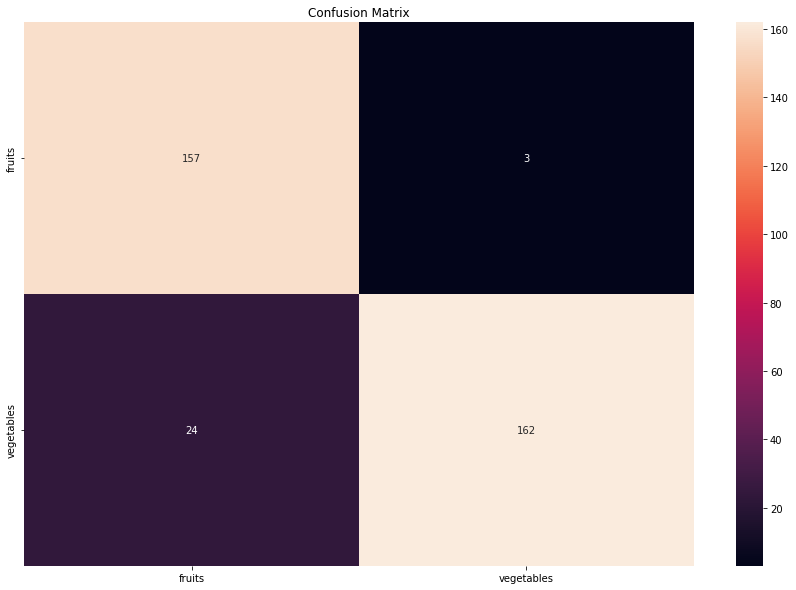

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

labels=os.listdir(PATH_DATASET_PREPROCESSED_BINARY)
labels = sorted(set(labels))

# Predict the label of the test_images
pred = model_3a_VGG16.predict(test_set)
#pred = np.argmax(pred,axis=1)
pred[pred <= 0.5] = 0
pred[pred > 0.5] = 1
pred = pred[:,0]

cf_matrix = confusion_matrix(test_labels, pred, normalize=None)
plt.figure(figsize = (15,10))
sns.heatmap(cf_matrix, 
            annot=True, 
            xticklabels = sorted(set(labels)), 
            yticklabels = sorted(set(labels)),
            fmt = "d"
            )

plt.title('Confusion Matrix')
plt.show()

####Fine-Tuning

In [ ]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
dir_name = PATH_HOME + "/models"
if not os.path.exists(dir_name):
  os.makedirs(dir_name)
save_path = os.path.join(dir_name,'BinaryClassifier_Model3a_VGG16_Fine_tuning.h5')
callbacks_list = [
                  keras.callbacks.ModelCheckpoint(
                      filepath=save_path,
                      monitor="val_loss",
                      verbose=1,
                      save_best_only=True)

                  ]
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10)

In [ ]:
history = model_3a_VGG16.fit(
      training_set,
      labels_set,
      epochs=50, 
      callbacks = [earlyStopping, callbacks_list],
      batch_size = BATCH_SIZE,
      validation_split = 0.1
)

Epoch 1/50
88/88 [==============================] - ETA: 0s - loss: 0.5111 - accuracy: 0.9441
Epoch 00001: val_loss improved from inf to 0.67040, saving model to /content/drive/Shareddrives/CIDL//models/BinaryClassifier_Model3a_VGG16_Fine_tuning.h5
88/88 [==============================] - 25s 287ms/step - loss: 0.5111 - accuracy: 0.9441 - val_loss: 0.6704 - val_accuracy: 0.9617
Epoch 2/50
88/88 [==============================] - ETA: 0s - loss: 0.5471 - accuracy: 0.9495
Epoch 00002: val_loss improved from 0.67040 to 0.42859, saving model to /content/drive/Shareddrives/CIDL//models/BinaryClassifier_Model3a_VGG16_Fine_tuning.h5
88/88 [==============================] - 26s 298ms/step - loss: 0.5471 - accuracy: 0.9495 - val_loss: 0.4286 - val_accuracy: 0.9681
Epoch 3/50
88/88 [==============================] - ETA: 0s - loss: 0.4715 - accuracy: 0.9559
Epoch 00003: val_loss did not improve from 0.42859
88/88 [==============================] - 25s 283ms/step - loss: 0.4715 - accuracy: 0.9559

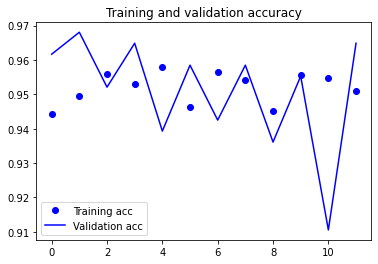

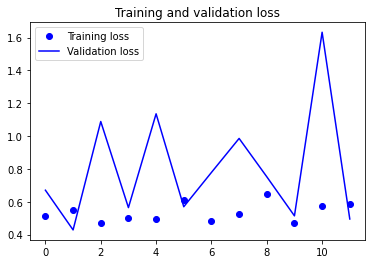

In [ ]:
import matplotlib.pyplot as plt

acc_1 = history.history['accuracy']
val_acc_1 = history.history['val_accuracy']
loss_1 = history.history['loss']
val_loss_1 = history.history['val_loss']

epochs = range(len(acc_1))

plt.plot(epochs, acc_1, 'bo', label='Training acc')
plt.plot(epochs, val_acc_1, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss_1, 'bo', label='Training loss')
plt.plot(epochs, val_loss_1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model_3a_VGG16.evaluate(test_set, test_labels)
test_acc

11/11 [==============================] - 3s 241ms/step - loss: 1.3987 - accuracy: 0.9538


0.9537572264671326

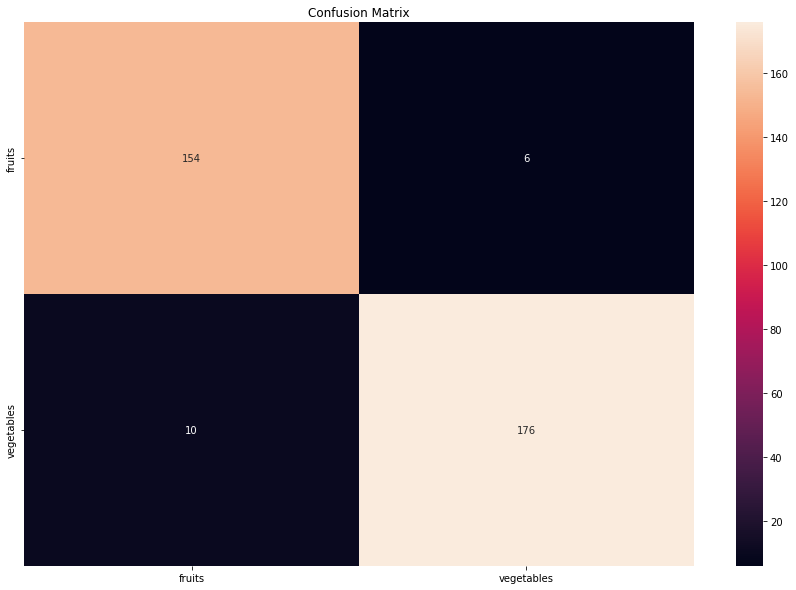

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

labels=os.listdir(PATH_DATASET_PREPROCESSED_BINARY)
labels = sorted(set(labels))

# Predict the label of the test_images
pred = model_3a_VGG16.predict(test_set)
#pred = np.argmax(pred,axis=1)
pred[pred <= 0.5] = 0
pred[pred > 0.5] = 1
pred = pred[:,0]

cf_matrix = confusion_matrix(test_labels, pred, normalize=None)
plt.figure(figsize = (15,10))
sns.heatmap(cf_matrix, 
            annot=True, 
            xticklabels = sorted(set(labels)), 
            yticklabels = sorted(set(labels)),
            fmt = "d"
            )

plt.title('Confusion Matrix')
plt.show()

###Model_3b_Drop0.5

####Feature Extraction


In [ ]:
conv_base.trainable = False

In [ ]:
np.random.seed(123)
rn.seed(123)
tf.random.set_seed(123)

inputs = keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3b_VGG16 = keras.Model(inputs, outputs)
model_3b_VGG16.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
dir_name = PATH_HOME + "/models"
if not os.path.exists(dir_name):
  os.makedirs(dir_name)
save_path = os.path.join(dir_name,'BinaryClassifier_Model3b_VGG16_feature_extraction.h5')
callbacks_list = [
                  keras.callbacks.ModelCheckpoint(
                      filepath=save_path,
                      monitor="val_loss",
                      verbose=1,
                      save_best_only=True)

                  ]
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10)

In [ ]:
history = model_3b_VGG16.fit(
      training_set,
      labels_set,
      epochs=50, 
      callbacks = [earlyStopping, callbacks_list],
      batch_size = BATCH_SIZE,
      validation_split = 0.1
)

Epoch 1/50
88/88 [==============================] - ETA: 0s - loss: 32.4109 - accuracy: 0.8370
Epoch 00001: val_loss improved from inf to 7.22625, saving model to /content/drive/Shareddrives/CIDL//models/BinaryClassifier_Model3b_VGG16_feature_extraction.h5
88/88 [==============================] - 27s 288ms/step - loss: 32.4109 - accuracy: 0.8370 - val_loss: 7.2262 - val_accuracy: 0.9489
Epoch 2/50
88/88 [==============================] - ETA: 0s - loss: 16.3553 - accuracy: 0.8932
Epoch 00002: val_loss did not improve from 7.22625
88/88 [==============================] - 25s 281ms/step - loss: 16.3553 - accuracy: 0.8932 - val_loss: 7.8516 - val_accuracy: 0.9297
Epoch 3/50
88/88 [==============================] - ETA: 0s - loss: 10.6279 - accuracy: 0.9199
Epoch 00003: val_loss did not improve from 7.22625
88/88 [==============================] - 25s 283ms/step - loss: 10.6279 - accuracy: 0.9199 - val_loss: 8.8611 - val_accuracy: 0.9393
Epoch 4/50
88/88 [==============================] - 

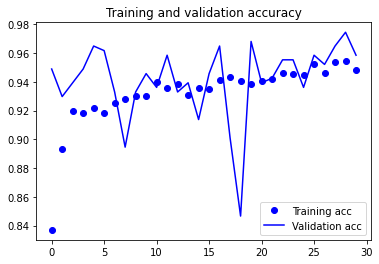

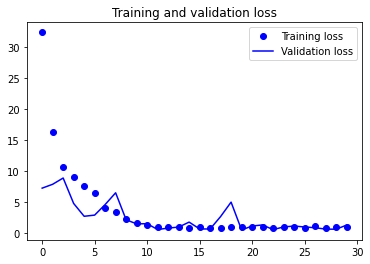

In [ ]:
import matplotlib.pyplot as plt

acc_1 = history.history['accuracy']
val_acc_1 = history.history['val_accuracy']
loss_1 = history.history['loss']
val_loss_1 = history.history['val_loss']

epochs = range(len(acc_1))

plt.plot(epochs, acc_1, 'bo', label='Training acc')
plt.plot(epochs, val_acc_1, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss_1, 'bo', label='Training loss')
plt.plot(epochs, val_loss_1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model_3b_VGG16.evaluate(test_set, test_labels)
test_acc

11/11 [==============================] - 3s 240ms/step - loss: 2.6114 - accuracy: 0.9422


0.9421965479850769

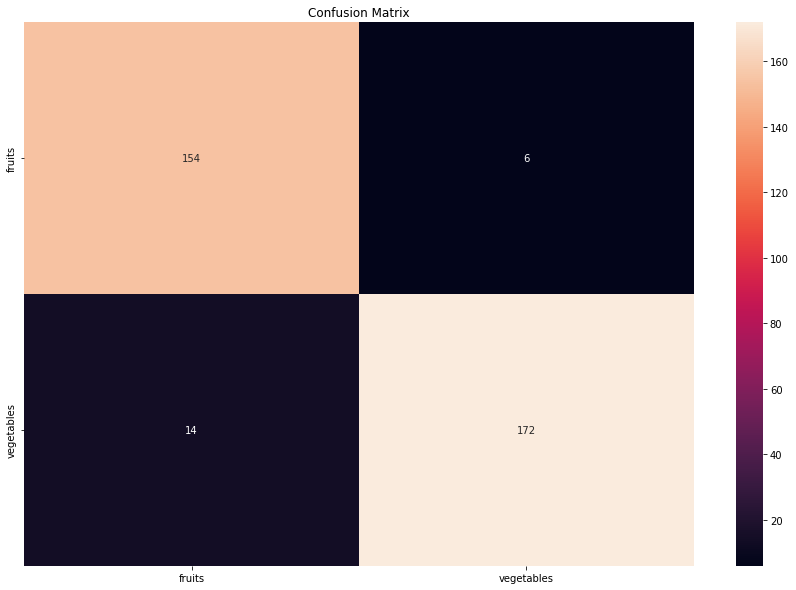

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

labels=os.listdir(PATH_DATASET_PREPROCESSED_BINARY)
labels = sorted(set(labels))

# Predict the label of the test_images
pred = model_3b_VGG16.predict(test_set)
#pred = np.argmax(pred,axis=1)
pred[pred <= 0.5] = 0
pred[pred > 0.5] = 1
pred = pred[:,0]

cf_matrix = confusion_matrix(test_labels, pred, normalize=None)
plt.figure(figsize = (15,10))
sns.heatmap(cf_matrix, 
            annot=True, 
            xticklabels = sorted(set(labels)), 
            yticklabels = sorted(set(labels)),
            fmt = "d"
            )

plt.title('Confusion Matrix')
plt.show()

####Fine-Tuning

In [ ]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
dir_name = PATH_HOME + "/models"
if not os.path.exists(dir_name):
  os.makedirs(dir_name)
save_path = os.path.join(dir_name,'BinaryClassifier_Model3b_VGG16_Fine_tuning.h5')
callbacks_list = [
                  keras.callbacks.ModelCheckpoint(
                      filepath=save_path,
                      monitor="val_loss",
                      verbose=1,
                      save_best_only=True)

                  ]
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10)

In [ ]:
history = model_3b_VGG16.fit(
      training_set,
      labels_set,
      epochs=50, 
      callbacks = [earlyStopping, callbacks_list],
      batch_size = BATCH_SIZE,
      validation_split = 0.1
)

Epoch 1/50
88/88 [==============================] - ETA: 0s - loss: 1.1169 - accuracy: 0.9488
Epoch 00001: val_loss improved from inf to 0.67017, saving model to /content/drive/Shareddrives/CIDL//models/BinaryClassifier_Model3b_VGG16_Fine_tuning.h5
88/88 [==============================] - 25s 284ms/step - loss: 1.1169 - accuracy: 0.9488 - val_loss: 0.6702 - val_accuracy: 0.9617
Epoch 2/50
88/88 [==============================] - ETA: 0s - loss: 0.8462 - accuracy: 0.9498
Epoch 00002: val_loss did not improve from 0.67017
88/88 [==============================] - 24s 276ms/step - loss: 0.8462 - accuracy: 0.9498 - val_loss: 1.1261 - val_accuracy: 0.9489
Epoch 3/50
88/88 [==============================] - ETA: 0s - loss: 0.9523 - accuracy: 0.9520
Epoch 00003: val_loss improved from 0.67017 to 0.55923, saving model to /content/drive/Shareddrives/CIDL//models/BinaryClassifier_Model3b_VGG16_Fine_tuning.h5
88/88 [==============================] - 26s 291ms/step - loss: 0.9523 - accuracy: 0.9520

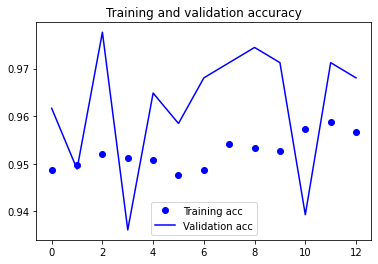

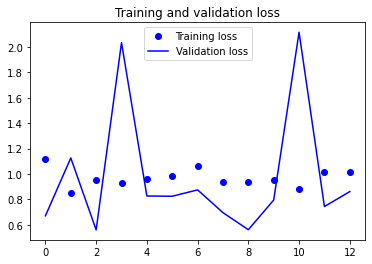

In [ ]:
import matplotlib.pyplot as plt

acc_1 = history.history['accuracy']
val_acc_1 = history.history['val_accuracy']
loss_1 = history.history['loss']
val_loss_1 = history.history['val_loss']

epochs = range(len(acc_1))

plt.plot(epochs, acc_1, 'bo', label='Training acc')
plt.plot(epochs, val_acc_1, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss_1, 'bo', label='Training loss')
plt.plot(epochs, val_loss_1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model_3b_VGG16.evaluate(test_set, test_labels)
test_acc

11/11 [==============================] - 3s 239ms/step - loss: 2.1821 - accuracy: 0.9480


0.9479768872261047

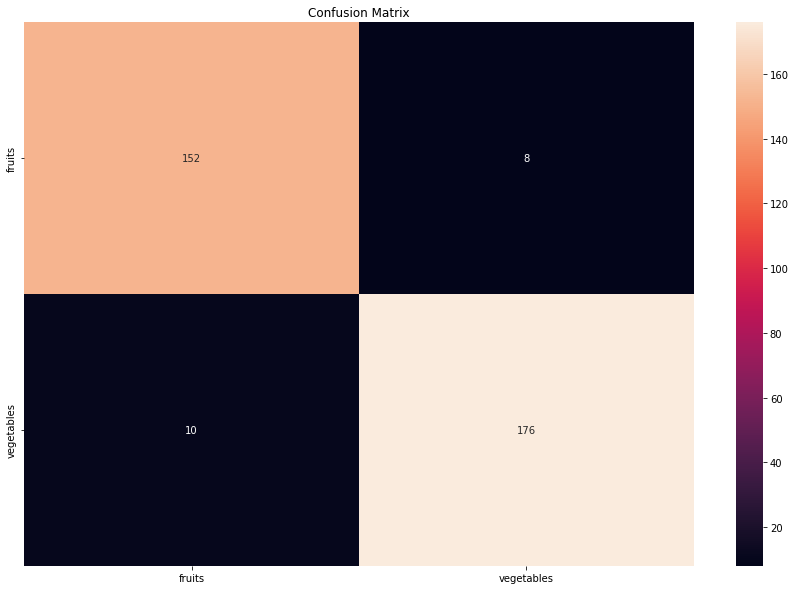

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

labels=os.listdir(PATH_DATASET_PREPROCESSED_BINARY)
labels = sorted(set(labels))

# Predict the label of the test_images
pred = model_3b_VGG16.predict(test_set)
#pred = np.argmax(pred,axis=1)
pred[pred <= 0.5] = 0
pred[pred > 0.5] = 1
pred = pred[:,0]

cf_matrix = confusion_matrix(test_labels, pred, normalize=None)
plt.figure(figsize = (15,10))
sns.heatmap(cf_matrix, 
            annot=True, 
            xticklabels = sorted(set(labels)), 
            yticklabels = sorted(set(labels)),
            fmt = "d"
            )

plt.title('Confusion Matrix')
plt.show()

###Model_4_RelL1L2

####Feature Extraction


In [ ]:
conv_base.trainable = False

In [ ]:
np.random.seed(123)
rn.seed(123)
tf.random.set_seed(123)

reg = regularizers.l1_l2(l1=1e-5, l2=1e-4)
inputs = keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256, kernel_regularizer=reg)(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4_VGG16 = keras.Model(inputs, outputs)
model_4_VGG16.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
dir_name = PATH_HOME + "/models"
if not os.path.exists(dir_name):
  os.makedirs(dir_name)
save_path = os.path.join(dir_name,'BinaryClassifier_Model4_VGG16_feature_extraction.h5')
callbacks_list = [
                  keras.callbacks.ModelCheckpoint(
                      filepath=save_path,
                      monitor="val_loss",
                      verbose=1,
                      save_best_only=True)

                  ]
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10)

In [ ]:
history = model_4_VGG16.fit(
      training_set,
      labels_set,
      epochs=50, 
      callbacks = [earlyStopping, callbacks_list],
      batch_size = BATCH_SIZE,
      validation_split = 0.1
)

Epoch 1/50
88/88 [==============================] - ETA: 0s - loss: 32.8444 - accuracy: 0.8310
Epoch 00001: val_loss improved from inf to 35.43641, saving model to /content/drive/Shareddrives/CIDL//models/BinaryClassifier_Model4_VGG16_feature_extraction.h5
88/88 [==============================] - 27s 287ms/step - loss: 32.8444 - accuracy: 0.8310 - val_loss: 35.4364 - val_accuracy: 0.8211
Epoch 2/50
88/88 [==============================] - ETA: 0s - loss: 9.6159 - accuracy: 0.9128
Epoch 00002: val_loss did not improve from 35.43641
88/88 [==============================] - 24s 277ms/step - loss: 9.6159 - accuracy: 0.9128 - val_loss: 48.2679 - val_accuracy: 0.7348
Epoch 3/50
88/88 [==============================] - ETA: 0s - loss: 7.3968 - accuracy: 0.9082
Epoch 00003: val_loss improved from 35.43641 to 4.40309, saving model to /content/drive/Shareddrives/CIDL//models/BinaryClassifier_Model4_VGG16_feature_extraction.h5
88/88 [==============================] - 26s 294ms/step - loss: 7.3968

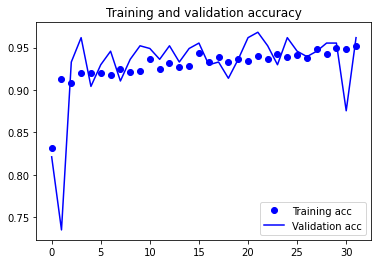

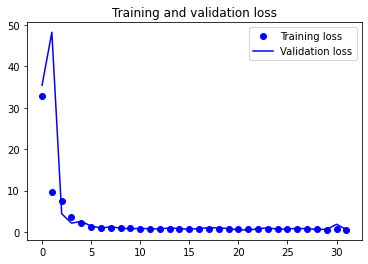

In [ ]:
import matplotlib.pyplot as plt

acc_1 = history.history['accuracy']
val_acc_1 = history.history['val_accuracy']
loss_1 = history.history['loss']
val_loss_1 = history.history['val_loss']

epochs = range(len(acc_1))

plt.plot(epochs, acc_1, 'bo', label='Training acc')
plt.plot(epochs, val_acc_1, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss_1, 'bo', label='Training loss')
plt.plot(epochs, val_loss_1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model_4_VGG16.evaluate(test_set, test_labels)
test_acc

11/11 [==============================] - 3s 240ms/step - loss: 0.9053 - accuracy: 0.9480


0.9479768872261047

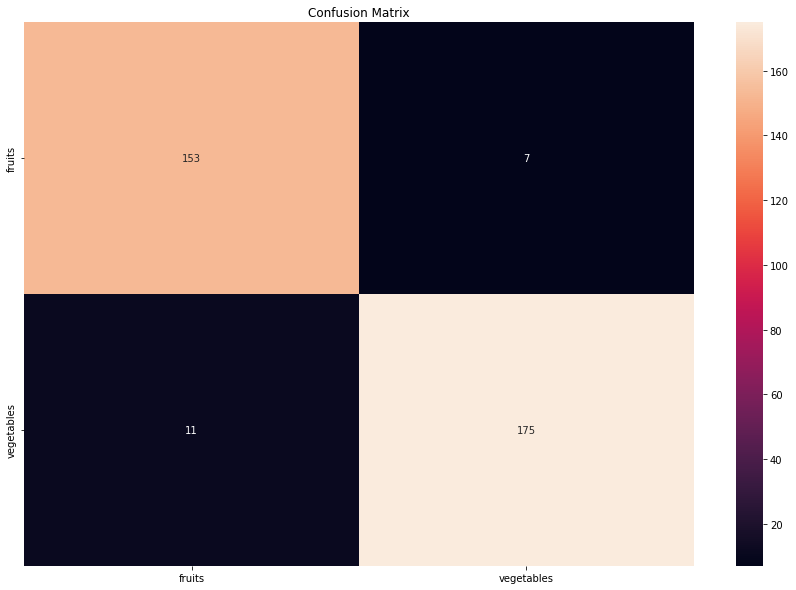

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

labels=os.listdir(PATH_DATASET_PREPROCESSED_BINARY)
labels = sorted(set(labels))

# Predict the label of the test_images
pred = model_4_VGG16.predict(test_set)
#pred = np.argmax(pred,axis=1)
pred[pred <= 0.5] = 0
pred[pred > 0.5] = 1
pred = pred[:,0]

cf_matrix = confusion_matrix(test_labels, pred, normalize=None)
plt.figure(figsize = (15,10))
sns.heatmap(cf_matrix, 
            annot=True, 
            xticklabels = sorted(set(labels)), 
            yticklabels = sorted(set(labels)),
            fmt = "d"
            )

plt.title('Confusion Matrix')
plt.show()

####Fine-Tuning

In [ ]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
dir_name = PATH_HOME + "/models"
if not os.path.exists(dir_name):
  os.makedirs(dir_name)
save_path = os.path.join(dir_name,'BinaryClassifier_Model4_VGG16_Fine_tuning.h5')
callbacks_list = [
                  keras.callbacks.ModelCheckpoint(
                      filepath=save_path,
                      monitor="val_loss",
                      verbose=1,
                      save_best_only=True)

                  ]
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10)

In [ ]:
history = model_4_VGG16.fit(
      training_set,
      labels_set,
      epochs=50, 
      callbacks = [earlyStopping, callbacks_list],
      batch_size = BATCH_SIZE,
      validation_split = 0.1
)

Epoch 1/50
88/88 [==============================] - ETA: 0s - loss: 0.6324 - accuracy: 0.9509
Epoch 00001: val_loss improved from inf to 0.91101, saving model to /content/drive/Shareddrives/CIDL//models/BinaryClassifier_Model4_VGG16_Fine_tuning.h5
88/88 [==============================] - 25s 286ms/step - loss: 0.6324 - accuracy: 0.9509 - val_loss: 0.9110 - val_accuracy: 0.9425
Epoch 2/50
88/88 [==============================] - ETA: 0s - loss: 0.6631 - accuracy: 0.9416
Epoch 00002: val_loss improved from 0.91101 to 0.60694, saving model to /content/drive/Shareddrives/CIDL//models/BinaryClassifier_Model4_VGG16_Fine_tuning.h5
88/88 [==============================] - 26s 294ms/step - loss: 0.6631 - accuracy: 0.9416 - val_loss: 0.6069 - val_accuracy: 0.9489
Epoch 3/50
88/88 [==============================] - ETA: 0s - loss: 0.6519 - accuracy: 0.9416
Epoch 00003: val_loss improved from 0.60694 to 0.57431, saving model to /content/drive/Shareddrives/CIDL//models/BinaryClassifier_Model4_VGG16

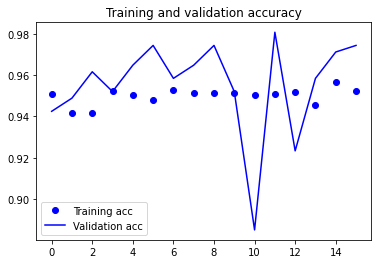

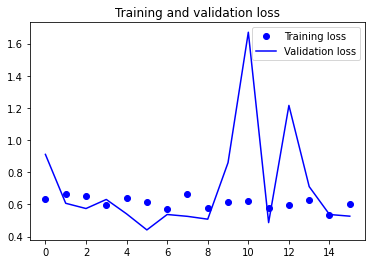

In [ ]:
import matplotlib.pyplot as plt

acc_1 = history.history['accuracy']
val_acc_1 = history.history['val_accuracy']
loss_1 = history.history['loss']
val_loss_1 = history.history['val_loss']

epochs = range(len(acc_1))

plt.plot(epochs, acc_1, 'bo', label='Training acc')
plt.plot(epochs, val_acc_1, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss_1, 'bo', label='Training loss')
plt.plot(epochs, val_loss_1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model_4_VGG16.evaluate(test_set, test_labels)
test_acc

11/11 [==============================] - 3s 239ms/step - loss: 1.1393 - accuracy: 0.9451


0.9450867176055908

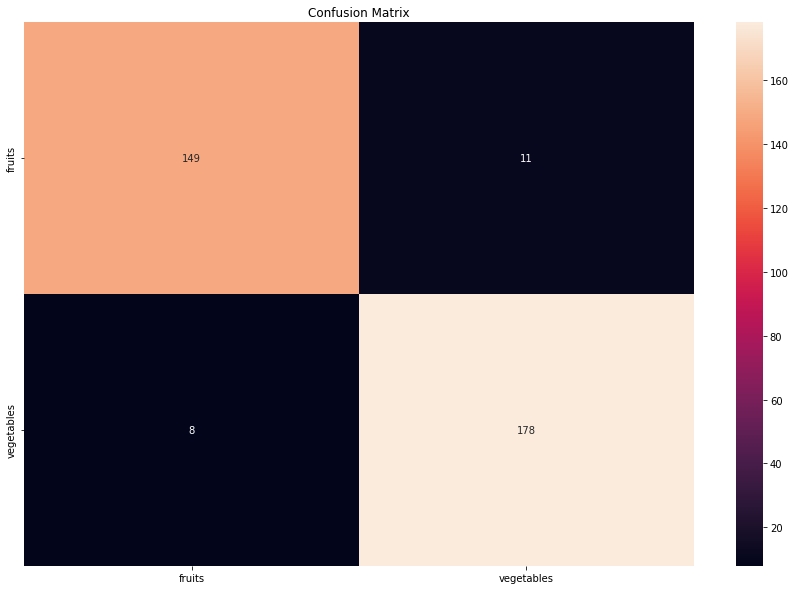

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

labels=os.listdir(PATH_DATASET_PREPROCESSED_BINARY)
labels = sorted(set(labels))

# Predict the label of the test_images
pred = model_4_VGG16.predict(test_set)
#pred = np.argmax(pred,axis=1)
pred[pred <= 0.5] = 0
pred[pred > 0.5] = 1
pred = pred[:,0]

cf_matrix = confusion_matrix(test_labels, pred, normalize=None)
plt.figure(figsize = (15,10))
sns.heatmap(cf_matrix, 
            annot=True, 
            xticklabels = sorted(set(labels)), 
            yticklabels = sorted(set(labels)),
            fmt = "d"
            )

plt.title('Confusion Matrix')
plt.show()

##InceptionV3


In [ ]:
from tensorflow.keras.applications import InceptionV3

conv_base = keras.applications.inception_v3.InceptionV3(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3))

conv_base.summary()

87924736/87910968 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_9[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)           

###Model_1_Base

####Feature Extraction


In [ ]:
conv_base.trainable = False

In [ ]:
np.random.seed(123)
rn.seed(123)
tf.random.set_seed(123)

inputs = keras.Input(shape=(224, 224, 3))
x = keras.applications.inception_v3.preprocess_input(inputs)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_1_Inception = keras.Model(inputs, outputs)
model_1_Inception.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
dir_name = PATH_HOME + "/models"
if not os.path.exists(dir_name):
  os.makedirs(dir_name)
save_path = os.path.join(dir_name,'BinaryClassifier_Model1_InceptionV3_feature_extraction.h5')
callbacks_list = [
                  keras.callbacks.ModelCheckpoint(
                      filepath=save_path,
                      monitor="val_loss",
                      verbose=1,
                      save_best_only=True)

                  ]
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10)

In [ ]:
history = model_1_Inception.fit(
      training_set,
      labels_set,
      epochs=50, 
      callbacks = [earlyStopping, callbacks_list],
      batch_size = BATCH_SIZE,
      validation_split = 0.1
)

Epoch 1/50
88/88 [==============================] - ETA: 0s - loss: 26.9068 - accuracy: 0.8206
Epoch 00001: val_loss improved from inf to 2.11951, saving model to /content/drive/Shareddrives/CIDL//models/BinaryClassifier_Model1_InceptionV3_feature_extraction.h5
88/88 [==============================] - 30s 260ms/step - loss: 26.9068 - accuracy: 0.8206 - val_loss: 2.1195 - val_accuracy: 0.9553
Epoch 2/50
88/88 [==============================] - ETA: 0s - loss: 3.4944 - accuracy: 0.9192
Epoch 00002: val_loss improved from 2.11951 to 1.06858, saving model to /content/drive/Shareddrives/CIDL//models/BinaryClassifier_Model1_InceptionV3_feature_extraction.h5
88/88 [==============================] - 19s 220ms/step - loss: 3.4944 - accuracy: 0.9192 - val_loss: 1.0686 - val_accuracy: 0.9457
Epoch 3/50
88/88 [==============================] - ETA: 0s - loss: 0.6658 - accuracy: 0.9505
Epoch 00003: val_loss improved from 1.06858 to 0.72587, saving model to /content/drive/Shareddrives/CIDL//models/B

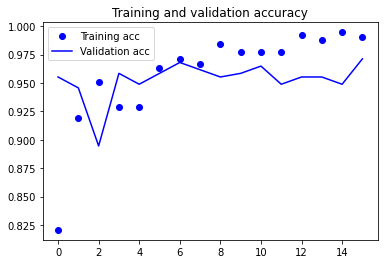

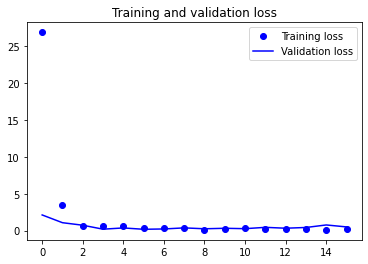

In [ ]:
import matplotlib.pyplot as plt

acc_1 = history.history['accuracy']
val_acc_1 = history.history['val_accuracy']
loss_1 = history.history['loss']
val_loss_1 = history.history['val_loss']

epochs = range(len(acc_1))

plt.plot(epochs, acc_1, 'bo', label='Training acc')
plt.plot(epochs, val_acc_1, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss_1, 'bo', label='Training loss')
plt.plot(epochs, val_loss_1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model_1_Inception.evaluate(test_set, test_labels)
test_acc

11/11 [==============================] - 2s 170ms/step - loss: 0.6391 - accuracy: 0.9451


0.9450867176055908

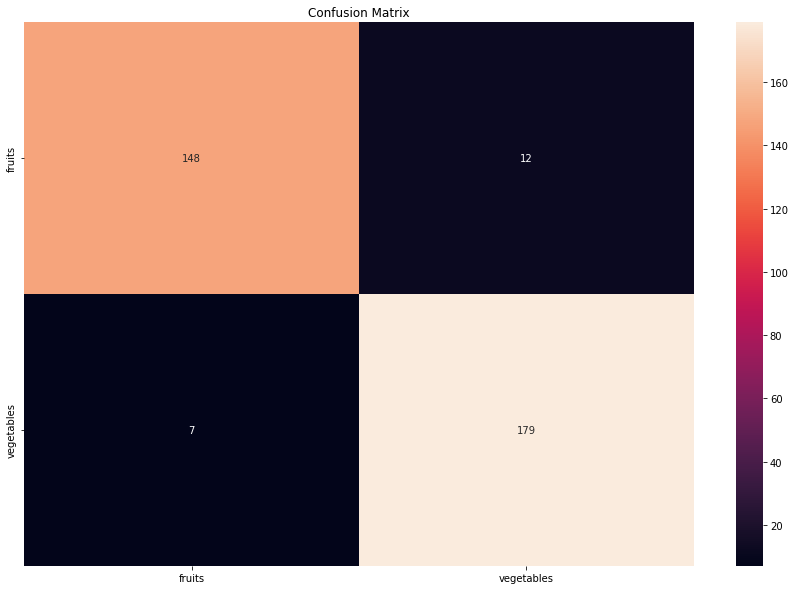

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

labels=os.listdir(PATH_DATASET_PREPROCESSED_BINARY)
labels = sorted(set(labels))

# Predict the label of the test_images
pred = model_1_Inception.predict(test_set)
#pred = np.argmax(pred,axis=1)
pred[pred <= 0.5] = 0
pred[pred > 0.5] = 1
pred = pred[:,0]

cf_matrix = confusion_matrix(test_labels, pred, normalize=None)
plt.figure(figsize = (15,10))
sns.heatmap(cf_matrix, 
            annot=True, 
            xticklabels = sorted(set(labels)), 
            yticklabels = sorted(set(labels)),
            fmt = "d"
            )

plt.title('Confusion Matrix')
plt.show()

####Fine-Tuning

In [ ]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'conv2d_93':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

conv_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_9[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [ ]:
dir_name = PATH_HOME + "/models"
if not os.path.exists(dir_name):
  os.makedirs(dir_name)
save_path = os.path.join(dir_name,'BinaryClassifier_Model1_InceptionV3_Fine_tuning.h5')
callbacks_list = [
                  keras.callbacks.ModelCheckpoint(
                      filepath=save_path,
                      monitor="val_loss",
                      verbose=1,
                      save_best_only=True)

                  ]
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10)

In [ ]:
history = model_1_Inception.fit(
      training_set,
      labels_set,
      epochs=50, 
      callbacks = [earlyStopping, callbacks_list],
      batch_size = BATCH_SIZE,
      validation_split = 0.1
)

Epoch 1/50
88/88 [==============================] - ETA: 0s - loss: 0.0341 - accuracy: 0.9957
Epoch 00001: val_loss improved from inf to 2.57171, saving model to /content/drive/Shareddrives/CIDL//models/BinaryClassifier_Model1_InceptionV3_Fine_tuning.h5
88/88 [==============================] - 20s 222ms/step - loss: 0.0341 - accuracy: 0.9957 - val_loss: 2.5717 - val_accuracy: 0.8914
Epoch 2/50
88/88 [==============================] - ETA: 0s - loss: 0.1596 - accuracy: 0.9865
Epoch 00002: val_loss improved from 2.57171 to 0.40495, saving model to /content/drive/Shareddrives/CIDL//models/BinaryClassifier_Model1_InceptionV3_Fine_tuning.h5
88/88 [==============================] - 19s 221ms/step - loss: 0.1596 - accuracy: 0.9865 - val_loss: 0.4049 - val_accuracy: 0.9681
Epoch 3/50
88/88 [==============================] - ETA: 0s - loss: 0.2163 - accuracy: 0.9879
Epoch 00003: val_loss did not improve from 0.40495
88/88 [==============================] - 17s 192ms/step - loss: 0.2163 - accura

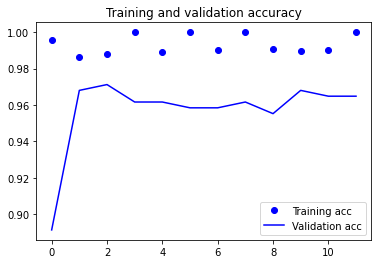

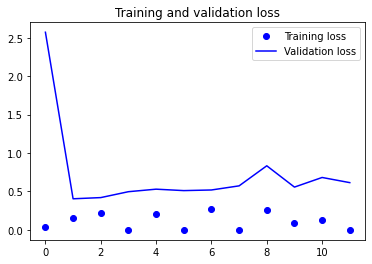

In [ ]:
import matplotlib.pyplot as plt

acc_1 = history.history['accuracy']
val_acc_1 = history.history['val_accuracy']
loss_1 = history.history['loss']
val_loss_1 = history.history['val_loss']

epochs = range(len(acc_1))

plt.plot(epochs, acc_1, 'bo', label='Training acc')
plt.plot(epochs, val_acc_1, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss_1, 'bo', label='Training loss')
plt.plot(epochs, val_loss_1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model_1_Inception.evaluate(test_set, test_labels)
test_acc

11/11 [==============================] - 2s 170ms/step - loss: 0.7468 - accuracy: 0.9480


0.9479768872261047

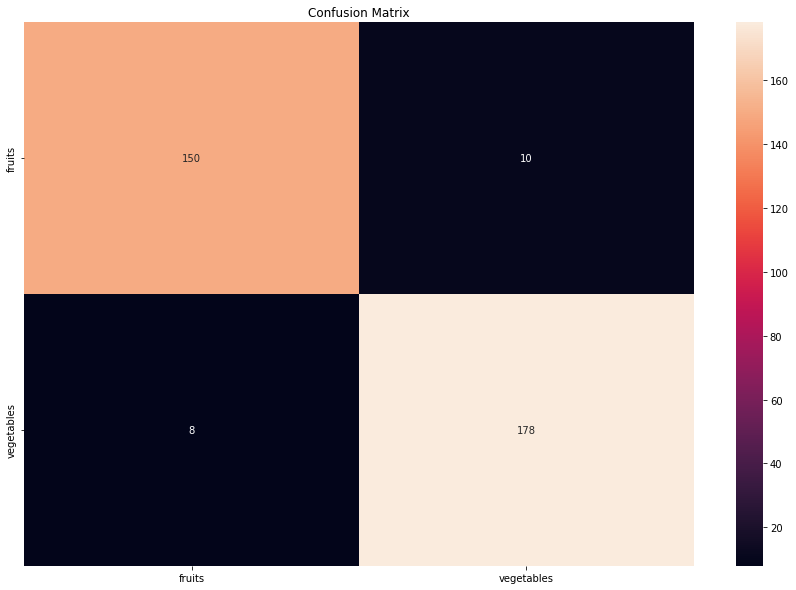

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

labels=os.listdir(PATH_DATASET_PREPROCESSED_BINARY)
labels = sorted(set(labels))

# Predict the label of the test_images
pred = model_1_Inception.predict(test_set)
#pred = np.argmax(pred,axis=1)
pred[pred <= 0.5] = 0
pred[pred > 0.5] = 1
pred = pred[:,0]

cf_matrix = confusion_matrix(test_labels, pred, normalize=None)
plt.figure(figsize = (15,10))
sns.heatmap(cf_matrix, 
            annot=True, 
            xticklabels = sorted(set(labels)), 
            yticklabels = sorted(set(labels)),
            fmt = "d"
            )

plt.title('Confusion Matrix')
plt.show()

###Model_2_Aug

####Feature Extraction


In [ ]:
conv_base.trainable = False

In [ ]:
np.random.seed(123)
rn.seed(123)
tf.random.set_seed(123)

inputs = keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = keras.applications.inception_v3.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2_Inception = keras.Model(inputs, outputs)
model_2_Inception.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
dir_name = PATH_HOME + "/models"
if not os.path.exists(dir_name):
  os.makedirs(dir_name)
save_path = os.path.join(dir_name,'BinaryClassifier_Model2_InceptionV3_feature_extraction.h5')
callbacks_list = [
                  keras.callbacks.ModelCheckpoint(
                      filepath=save_path,
                      monitor="val_loss",
                      verbose=1,
                      save_best_only=True)

                  ]
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10)

In [ ]:
history = model_2_Inception.fit(
      training_set,
      labels_set,
      epochs=50, 
      callbacks = [earlyStopping, callbacks_list],
      batch_size = BATCH_SIZE,
      validation_split = 0.1
)

Epoch 1/50
88/88 [==============================] - ETA: 0s - loss: 37.0893 - accuracy: 0.7769
Epoch 00001: val_loss improved from inf to 15.10496, saving model to /content/drive/Shareddrives/CIDL//models/BinaryClassifier_Model2_InceptionV3_feature_extraction.h5
88/88 [==============================] - 27s 238ms/step - loss: 37.0893 - accuracy: 0.7769 - val_loss: 15.1050 - val_accuracy: 0.7572
Epoch 2/50
88/88 [==============================] - ETA: 0s - loss: 5.6075 - accuracy: 0.8594
Epoch 00002: val_loss improved from 15.10496 to 0.57918, saving model to /content/drive/Shareddrives/CIDL//models/BinaryClassifier_Model2_InceptionV3_feature_extraction.h5
88/88 [==============================] - 21s 234ms/step - loss: 5.6075 - accuracy: 0.8594 - val_loss: 0.5792 - val_accuracy: 0.9521
Epoch 3/50
88/88 [==============================] - ETA: 0s - loss: 0.9027 - accuracy: 0.8861
Epoch 00003: val_loss improved from 0.57918 to 0.17337, saving model to /content/drive/Shareddrives/CIDL//model

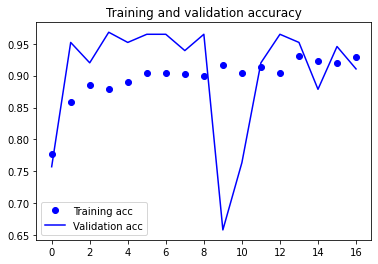

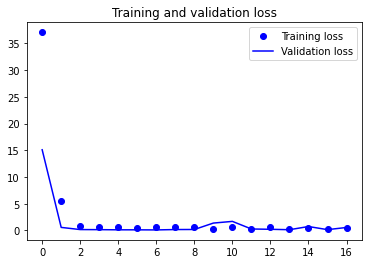

In [ ]:
import matplotlib.pyplot as plt

acc_1 = history.history['accuracy']
val_acc_1 = history.history['val_accuracy']
loss_1 = history.history['loss']
val_loss_1 = history.history['val_loss']

epochs = range(len(acc_1))

plt.plot(epochs, acc_1, 'bo', label='Training acc')
plt.plot(epochs, val_acc_1, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss_1, 'bo', label='Training loss')
plt.plot(epochs, val_loss_1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model_2_Inception.evaluate(test_set, test_labels)
test_acc

11/11 [==============================] - 2s 171ms/step - loss: 0.5534 - accuracy: 0.9249


0.9248554706573486

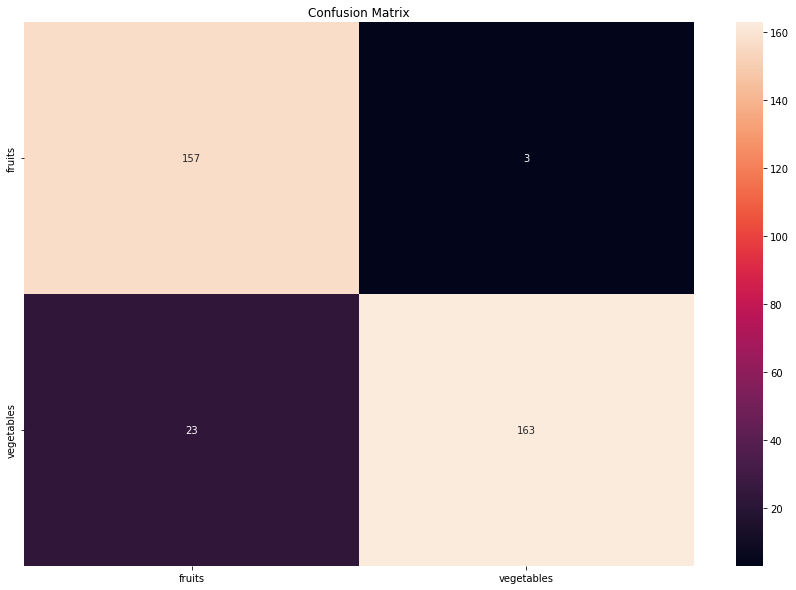

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

labels=os.listdir(PATH_DATASET_PREPROCESSED_BINARY)
labels = sorted(set(labels))

# Predict the label of the test_images
pred = model_2_Inception.predict(test_set)
#pred = np.argmax(pred,axis=1)
pred[pred <= 0.5] = 0
pred[pred > 0.5] = 1
pred = pred[:,0]

cf_matrix = confusion_matrix(test_labels, pred, normalize=None)
plt.figure(figsize = (15,10))
sns.heatmap(cf_matrix, 
            annot=True, 
            xticklabels = sorted(set(labels)), 
            yticklabels = sorted(set(labels)),
            fmt = "d"
            )

plt.title('Confusion Matrix')
plt.show()

####Fine-Tuning

In [ ]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'conv2d_93':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

conv_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_9[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [ ]:
dir_name = PATH_HOME + "/models"
if not os.path.exists(dir_name):
  os.makedirs(dir_name)
save_path = os.path.join(dir_name,'BinaryClassifier_Model2_InceptionV3_Fine_tuning.h5')
callbacks_list = [
                  keras.callbacks.ModelCheckpoint(
                      filepath=save_path,
                      monitor="val_loss",
                      verbose=1,
                      save_best_only=True)

                  ]
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10)

In [ ]:
history = model_2_Inception.fit(
      training_set,
      labels_set,
      epochs=50, 
      callbacks = [earlyStopping, callbacks_list],
      batch_size = BATCH_SIZE,
      validation_split = 0.1
)

Epoch 1/50
88/88 [==============================] - ETA: 0s - loss: 0.4163 - accuracy: 0.9359
Epoch 00001: val_loss improved from inf to 0.47894, saving model to /content/drive/Shareddrives/CIDL//models/BinaryClassifier_Model2_InceptionV3_Fine_tuning.h5
88/88 [==============================] - 19s 220ms/step - loss: 0.4163 - accuracy: 0.9359 - val_loss: 0.4789 - val_accuracy: 0.8818
Epoch 2/50
88/88 [==============================] - ETA: 0s - loss: 0.5534 - accuracy: 0.9082
Epoch 00002: val_loss improved from 0.47894 to 0.16141, saving model to /content/drive/Shareddrives/CIDL//models/BinaryClassifier_Model2_InceptionV3_Fine_tuning.h5
88/88 [==============================] - 21s 234ms/step - loss: 0.5534 - accuracy: 0.9082 - val_loss: 0.1614 - val_accuracy: 0.9617
Epoch 3/50
88/88 [==============================] - ETA: 0s - loss: 0.3572 - accuracy: 0.9256
Epoch 00003: val_loss did not improve from 0.16141
88/88 [==============================] - 18s 203ms/step - loss: 0.3572 - accura

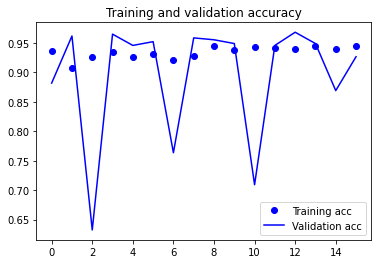

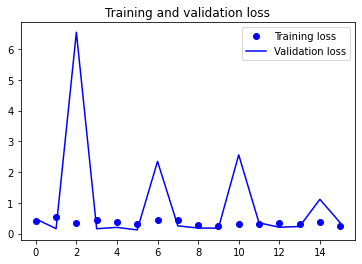

In [ ]:
import matplotlib.pyplot as plt

acc_1 = history.history['accuracy']
val_acc_1 = history.history['val_accuracy']
loss_1 = history.history['loss']
val_loss_1 = history.history['val_loss']

epochs = range(len(acc_1))

plt.plot(epochs, acc_1, 'bo', label='Training acc')
plt.plot(epochs, val_acc_1, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss_1, 'bo', label='Training loss')
plt.plot(epochs, val_loss_1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model_2_Inception.evaluate(test_set, test_labels)
test_acc

11/11 [==============================] - 2s 173ms/step - loss: 0.2028 - accuracy: 0.9364


0.9364162087440491

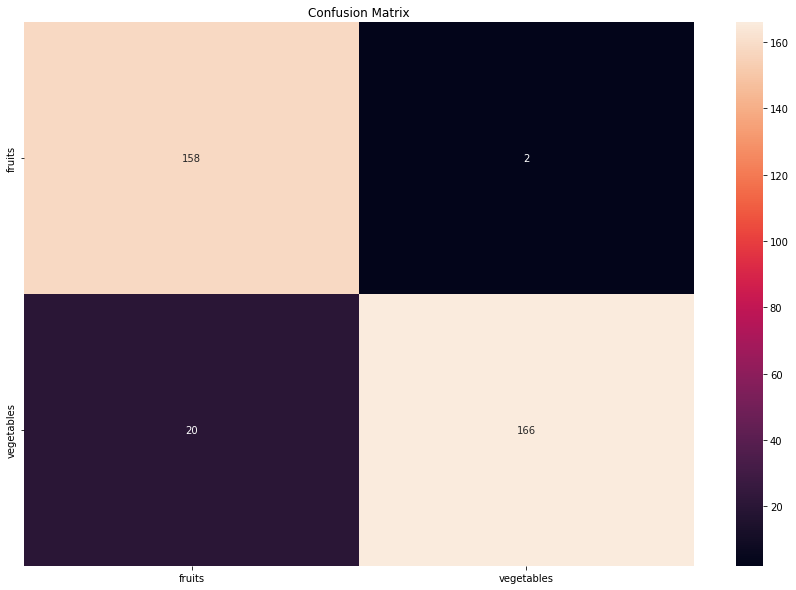

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

labels=os.listdir(PATH_DATASET_PREPROCESSED_BINARY)
labels = sorted(set(labels))

# Predict the label of the test_images
pred = model_2_Inception.predict(test_set)
#pred = np.argmax(pred,axis=1)
pred[pred <= 0.5] = 0
pred[pred > 0.5] = 1
pred = pred[:,0]

cf_matrix = confusion_matrix(test_labels, pred, normalize=None)
plt.figure(figsize = (15,10))
sns.heatmap(cf_matrix, 
            annot=True, 
            xticklabels = sorted(set(labels)), 
            yticklabels = sorted(set(labels)),
            fmt = "d"
            )

plt.title('Confusion Matrix')
plt.show()

###Model_3a_Drop0.2

####Feature Extraction


In [ ]:
conv_base.trainable = False

In [ ]:
np.random.seed(123)
rn.seed(123)
tf.random.set_seed(123)

inputs = keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = keras.applications.inception_v3.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3a_Inception = keras.Model(inputs, outputs)
model_3a_Inception.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
dir_name = PATH_HOME + "/models"
if not os.path.exists(dir_name):
  os.makedirs(dir_name)
save_path = os.path.join(dir_name,'BinaryClassifier_Model3a_InceptionV3_feature_extraction.h5')
callbacks_list = [
                  keras.callbacks.ModelCheckpoint(
                      filepath=save_path,
                      monitor="val_loss",
                      verbose=1,
                      save_best_only=True)

                  ]
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10)

In [ ]:
history = model_3a_Inception.fit(
      training_set,
      labels_set,
      epochs=50, 
      callbacks = [earlyStopping, callbacks_list],
      batch_size = BATCH_SIZE,
      validation_split = 0.1
)

Epoch 1/50
88/88 [==============================] - ETA: 0s - loss: 35.7072 - accuracy: 0.7790
Epoch 00001: val_loss improved from inf to 9.59986, saving model to /content/drive/Shareddrives/CIDL//models/BinaryClassifier_Model3a_InceptionV3_feature_extraction.h5
88/88 [==============================] - 28s 247ms/step - loss: 35.7072 - accuracy: 0.7790 - val_loss: 9.5999 - val_accuracy: 0.8978
Epoch 2/50
88/88 [==============================] - ETA: 0s - loss: 12.3454 - accuracy: 0.8708
Epoch 00002: val_loss improved from 9.59986 to 2.60782, saving model to /content/drive/Shareddrives/CIDL//models/BinaryClassifier_Model3a_InceptionV3_feature_extraction.h5
88/88 [==============================] - 20s 233ms/step - loss: 12.3454 - accuracy: 0.8708 - val_loss: 2.6078 - val_accuracy: 0.9457
Epoch 3/50
88/88 [==============================] - ETA: 0s - loss: 7.6659 - accuracy: 0.8737
Epoch 00003: val_loss did not improve from 2.60782
88/88 [==============================] - 18s 203ms/step - l

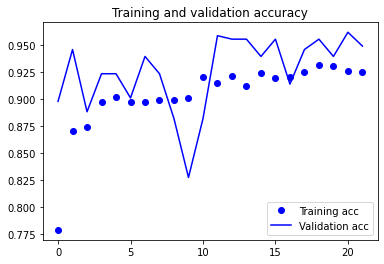

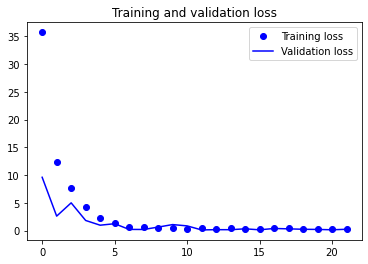

In [ ]:
import matplotlib.pyplot as plt

acc_1 = history.history['accuracy']
val_acc_1 = history.history['val_accuracy']
loss_1 = history.history['loss']
val_loss_1 = history.history['val_loss']

epochs = range(len(acc_1))

plt.plot(epochs, acc_1, 'bo', label='Training acc')
plt.plot(epochs, val_acc_1, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss_1, 'bo', label='Training loss')
plt.plot(epochs, val_loss_1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model_3a_Inception.evaluate(test_set, test_labels)
test_acc

11/11 [==============================] - 2s 172ms/step - loss: 0.2766 - accuracy: 0.9364


0.9364162087440491

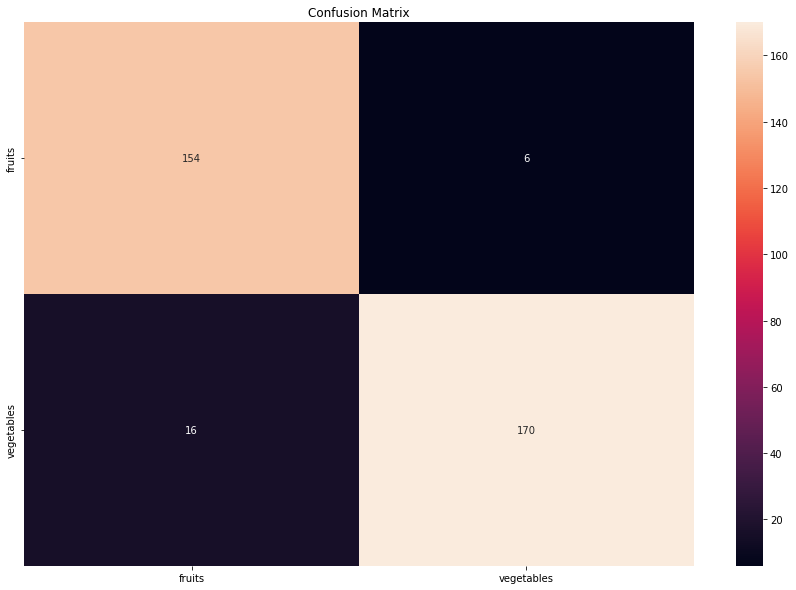

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

labels=os.listdir(PATH_DATASET_PREPROCESSED_BINARY)
labels = sorted(set(labels))

# Predict the label of the test_images
pred = model_3a_Inception.predict(test_set)
#pred = np.argmax(pred,axis=1)
pred[pred <= 0.5] = 0
pred[pred > 0.5] = 1
pred = pred[:,0]

cf_matrix = confusion_matrix(test_labels, pred, normalize=None)
plt.figure(figsize = (15,10))
sns.heatmap(cf_matrix, 
            annot=True, 
            xticklabels = sorted(set(labels)), 
            yticklabels = sorted(set(labels)),
            fmt = "d"
            )

plt.title('Confusion Matrix')
plt.show()

####Fine-Tuning

In [ ]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'conv2d_93':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

conv_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_9[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [ ]:
dir_name = PATH_HOME + "/models"
if not os.path.exists(dir_name):
  os.makedirs(dir_name)
save_path = os.path.join(dir_name,'BinaryClassifier_Model3a_InceptionV3_Fine_tuning.h5')
callbacks_list = [
                  keras.callbacks.ModelCheckpoint(
                      filepath=save_path,
                      monitor="val_loss",
                      verbose=1,
                      save_best_only=True)

                  ]
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10)

In [ ]:
history = model_3a_Inception.fit(
      training_set,
      labels_set,
      epochs=50, 
      callbacks = [earlyStopping, callbacks_list],
      batch_size = BATCH_SIZE,
      validation_split = 0.1
)

Epoch 1/50
88/88 [==============================] - ETA: 0s - loss: 0.3155 - accuracy: 0.9274
Epoch 00001: val_loss improved from inf to 0.74429, saving model to /content/drive/Shareddrives/CIDL//models/BinaryClassifier_Model3a_InceptionV3_Fine_tuning.h5
88/88 [==============================] - 19s 220ms/step - loss: 0.3155 - accuracy: 0.9274 - val_loss: 0.7443 - val_accuracy: 0.9042
Epoch 2/50
88/88 [==============================] - ETA: 0s - loss: 0.3388 - accuracy: 0.9335
Epoch 00002: val_loss improved from 0.74429 to 0.16716, saving model to /content/drive/Shareddrives/CIDL//models/BinaryClassifier_Model3a_InceptionV3_Fine_tuning.h5
88/88 [==============================] - 20s 231ms/step - loss: 0.3388 - accuracy: 0.9335 - val_loss: 0.1672 - val_accuracy: 0.9553
Epoch 3/50
88/88 [==============================] - ETA: 0s - loss: 0.3214 - accuracy: 0.9370
Epoch 00003: val_loss did not improve from 0.16716
88/88 [==============================] - 18s 204ms/step - loss: 0.3214 - accu

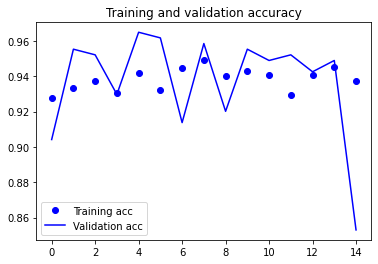

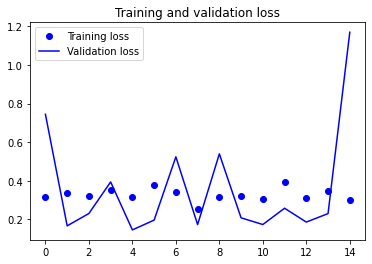

In [ ]:
import matplotlib.pyplot as plt

acc_1 = history.history['accuracy']
val_acc_1 = history.history['val_accuracy']
loss_1 = history.history['loss']
val_loss_1 = history.history['val_loss']

epochs = range(len(acc_1))

plt.plot(epochs, acc_1, 'bo', label='Training acc')
plt.plot(epochs, val_acc_1, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss_1, 'bo', label='Training loss')
plt.plot(epochs, val_loss_1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model_3a_Inception.evaluate(test_set, test_labels)
test_acc

11/11 [==============================] - 2s 173ms/step - loss: 1.0860 - accuracy: 0.8671


0.8670520186424255

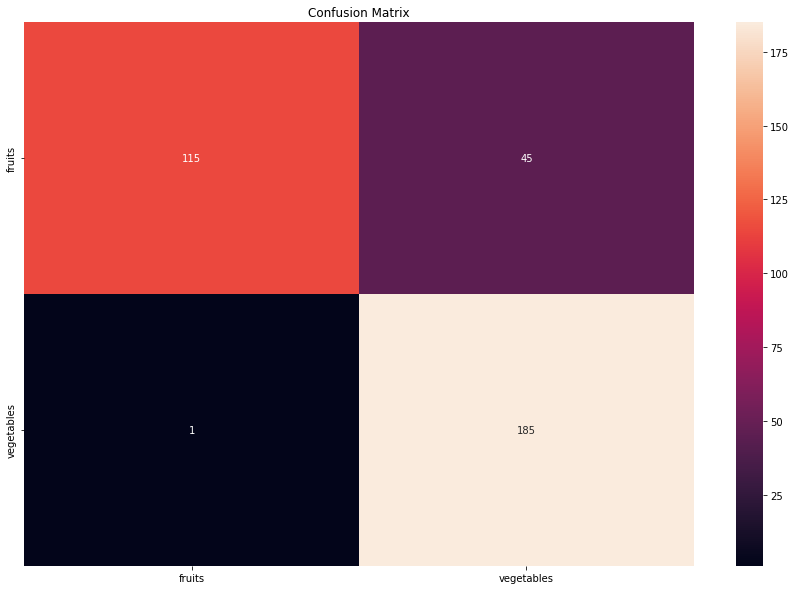

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

labels=os.listdir(PATH_DATASET_PREPROCESSED_BINARY)
labels = sorted(set(labels))

# Predict the label of the test_images
pred = model_3a_Inception.predict(test_set)
#pred = np.argmax(pred,axis=1)
pred[pred <= 0.5] = 0
pred[pred > 0.5] = 1
pred = pred[:,0]

cf_matrix = confusion_matrix(test_labels, pred, normalize=None)
plt.figure(figsize = (15,10))
sns.heatmap(cf_matrix, 
            annot=True, 
            xticklabels = sorted(set(labels)), 
            yticklabels = sorted(set(labels)),
            fmt = "d"
            )

plt.title('Confusion Matrix')
plt.show()

###Model_3b_Drop0.5

####Feature Extraction


In [ ]:
conv_base.trainable = False

In [ ]:
np.random.seed(123)
rn.seed(123)
tf.random.set_seed(123)

inputs = keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = keras.applications.inception_v3.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3b_Inception = keras.Model(inputs, outputs)
model_3b_Inception.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
dir_name = PATH_HOME + "/models"
if not os.path.exists(dir_name):
  os.makedirs(dir_name)
save_path = os.path.join(dir_name,'InceptionClassifier_Model3b_InceptionV3_feature_extraction.h5')
callbacks_list = [
                  keras.callbacks.ModelCheckpoint(
                      filepath=save_path,
                      monitor="val_loss",
                      verbose=1,
                      save_best_only=True)

                  ]
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10)

In [ ]:
history = model_3b_Inception.fit(
      training_set,
      labels_set,
      epochs=50, 
      callbacks = [earlyStopping, callbacks_list],
      batch_size = BATCH_SIZE,
      validation_split = 0.1
)

Epoch 1/50
88/88 [==============================] - ETA: 0s - loss: 35.2914 - accuracy: 0.7794
Epoch 00001: val_loss improved from inf to 23.26269, saving model to /content/drive/Shareddrives/CIDL//models/InceptionClassifier_Model3b_InceptionV3_feature_extraction.h5
88/88 [==============================] - 29s 248ms/step - loss: 35.2914 - accuracy: 0.7794 - val_loss: 23.2627 - val_accuracy: 0.7859
Epoch 2/50
88/88 [==============================] - ETA: 0s - loss: 13.6608 - accuracy: 0.8648
Epoch 00002: val_loss improved from 23.26269 to 13.14936, saving model to /content/drive/Shareddrives/CIDL//models/InceptionClassifier_Model3b_InceptionV3_feature_extraction.h5
88/88 [==============================] - 21s 235ms/step - loss: 13.6608 - accuracy: 0.8648 - val_loss: 13.1494 - val_accuracy: 0.8466
Epoch 3/50
88/88 [==============================] - ETA: 0s - loss: 11.0856 - accuracy: 0.8733
Epoch 00003: val_loss improved from 13.14936 to 5.53530, saving model to /content/drive/Shareddriv

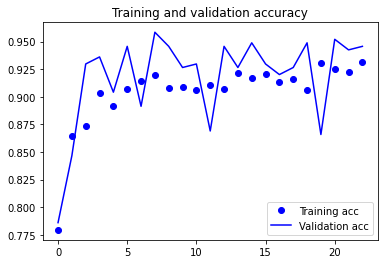

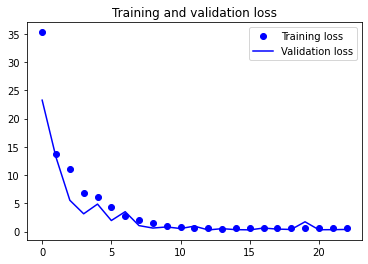

In [ ]:
import matplotlib.pyplot as plt

acc_1 = history.history['accuracy']
val_acc_1 = history.history['val_accuracy']
loss_1 = history.history['loss']
val_loss_1 = history.history['val_loss']

epochs = range(len(acc_1))

plt.plot(epochs, acc_1, 'bo', label='Training acc')
plt.plot(epochs, val_acc_1, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss_1, 'bo', label='Training loss')
plt.plot(epochs, val_loss_1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model_3b_Inception.evaluate(test_set, test_labels)
test_acc

11/11 [==============================] - 2s 172ms/step - loss: 0.4056 - accuracy: 0.9480


0.9479768872261047

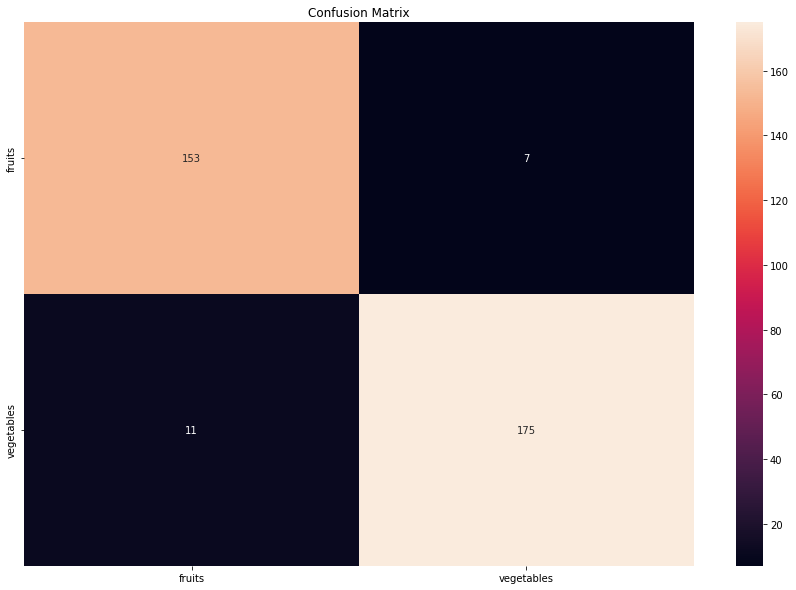

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

labels=os.listdir(PATH_DATASET_PREPROCESSED_BINARY)
labels = sorted(set(labels))

# Predict the label of the test_images
pred = model_3b_Inception.predict(test_set)
#pred = np.argmax(pred,axis=1)
pred[pred <= 0.5] = 0
pred[pred > 0.5] = 1
pred = pred[:,0]

cf_matrix = confusion_matrix(test_labels, pred, normalize=None)
plt.figure(figsize = (15,10))
sns.heatmap(cf_matrix, 
            annot=True, 
            xticklabels = sorted(set(labels)), 
            yticklabels = sorted(set(labels)),
            fmt = "d"
            )

plt.title('Confusion Matrix')
plt.show()

####Fine-Tuning

In [ ]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'conv2d_93':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

conv_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_9[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [ ]:
dir_name = PATH_HOME + "/models"
if not os.path.exists(dir_name):
  os.makedirs(dir_name)
save_path = os.path.join(dir_name,'BinaryClassifier_Model3b_InceptionV3_Fine_tuning.h5')
callbacks_list = [
                  keras.callbacks.ModelCheckpoint(
                      filepath=save_path,
                      monitor="val_loss",
                      verbose=1,
                      save_best_only=True)

                  ]
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10)

In [ ]:
history = model_3b_Inception.fit(
      training_set,
      labels_set,
      epochs=50, 
      callbacks = [earlyStopping, callbacks_list],
      batch_size = BATCH_SIZE,
      validation_split = 0.1
)

Epoch 1/50
88/88 [==============================] - ETA: 0s - loss: 0.5626 - accuracy: 0.9310
Epoch 00001: val_loss improved from inf to 0.26898, saving model to /content/drive/Shareddrives/CIDL//models/BinaryClassifier_Model3b_InceptionV3_Fine_tuning.h5
88/88 [==============================] - 19s 221ms/step - loss: 0.5626 - accuracy: 0.9310 - val_loss: 0.2690 - val_accuracy: 0.9649
Epoch 2/50
88/88 [==============================] - ETA: 0s - loss: 0.6023 - accuracy: 0.9238
Epoch 00002: val_loss did not improve from 0.26898
88/88 [==============================] - 18s 202ms/step - loss: 0.6023 - accuracy: 0.9238 - val_loss: 0.9011 - val_accuracy: 0.9042
Epoch 3/50
88/88 [==============================] - ETA: 0s - loss: 0.5812 - accuracy: 0.9299
Epoch 00003: val_loss improved from 0.26898 to 0.25644, saving model to /content/drive/Shareddrives/CIDL//models/BinaryClassifier_Model3b_InceptionV3_Fine_tuning.h5
88/88 [==============================] - 20s 230ms/step - loss: 0.5812 - accu

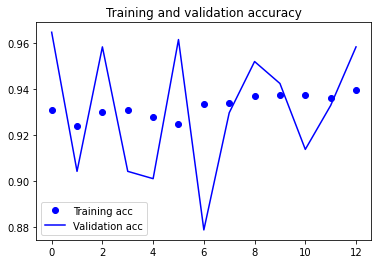

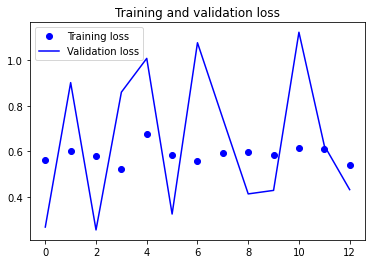

In [ ]:
import matplotlib.pyplot as plt

acc_1 = history.history['accuracy']
val_acc_1 = history.history['val_accuracy']
loss_1 = history.history['loss']
val_loss_1 = history.history['val_loss']

epochs = range(len(acc_1))

plt.plot(epochs, acc_1, 'bo', label='Training acc')
plt.plot(epochs, val_acc_1, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss_1, 'bo', label='Training loss')
plt.plot(epochs, val_loss_1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model_3b_Inception.evaluate(test_set, test_labels)
test_acc

11/11 [==============================] - 2s 170ms/step - loss: 0.5620 - accuracy: 0.9422


0.9421965479850769

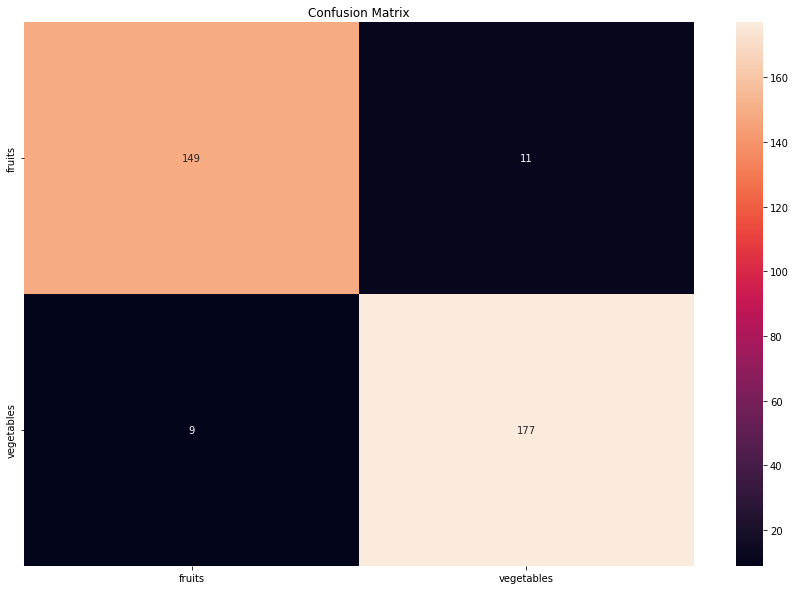

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

labels=os.listdir(PATH_DATASET_PREPROCESSED_BINARY)
labels = sorted(set(labels))

# Predict the label of the test_images
pred = model_3b_Inception.predict(test_set)
#pred = np.argmax(pred,axis=1)
pred[pred <= 0.5] = 0
pred[pred > 0.5] = 1
pred = pred[:,0]

cf_matrix = confusion_matrix(test_labels, pred, normalize=None)
plt.figure(figsize = (15,10))
sns.heatmap(cf_matrix, 
            annot=True, 
            xticklabels = sorted(set(labels)), 
            yticklabels = sorted(set(labels)),
            fmt = "d"
            )

plt.title('Confusion Matrix')
plt.show()

###Model_4_RelL1L2

####Feature Extraction


In [ ]:
conv_base.trainable = False

In [ ]:
np.random.seed(123)
rn.seed(123)
tf.random.set_seed(123)

reg = regularizers.l1_l2(l1=1e-5, l2=1e-4)
inputs = keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = keras.applications.inception_v3.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256, kernel_regularizer=reg)(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4_Inception = keras.Model(inputs, outputs)
model_4_Inception.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
dir_name = PATH_HOME + "/models"
if not os.path.exists(dir_name):
  os.makedirs(dir_name)
save_path = os.path.join(dir_name,'BinaryClassifier_Model4_InceptionV3_feature_extraction.h5')
callbacks_list = [
                  keras.callbacks.ModelCheckpoint(
                      filepath=save_path,
                      monitor="val_loss",
                      verbose=1,
                      save_best_only=True)

                  ]
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10)

In [ ]:
history = model_4_Inception.fit(
      training_set,
      labels_set,
      epochs=50, 
      callbacks = [earlyStopping, callbacks_list],
      batch_size = BATCH_SIZE,
      validation_split = 0.1
)

Epoch 1/50
88/88 [==============================] - ETA: 0s - loss: 31.1300 - accuracy: 0.7918
Epoch 00001: val_loss improved from inf to 32.44483, saving model to /content/drive/Shareddrives/CIDL//models/BinaryClassifier_Model4_InceptionV3_feature_extraction.h5
88/88 [==============================] - 29s 246ms/step - loss: 31.1300 - accuracy: 0.7918 - val_loss: 32.4448 - val_accuracy: 0.6997
Epoch 2/50
88/88 [==============================] - ETA: 0s - loss: 11.4927 - accuracy: 0.8651
Epoch 00002: val_loss improved from 32.44483 to 27.93864, saving model to /content/drive/Shareddrives/CIDL//models/BinaryClassifier_Model4_InceptionV3_feature_extraction.h5
88/88 [==============================] - 21s 239ms/step - loss: 11.4927 - accuracy: 0.8651 - val_loss: 27.9386 - val_accuracy: 0.6805
Epoch 3/50
88/88 [==============================] - ETA: 0s - loss: 6.7662 - accuracy: 0.8911
Epoch 00003: val_loss improved from 27.93864 to 9.20930, saving model to /content/drive/Shareddrives/CIDL//

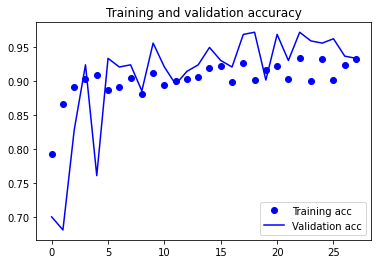

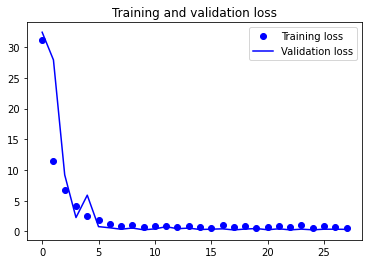

In [ ]:
import matplotlib.pyplot as plt

acc_1 = history.history['accuracy']
val_acc_1 = history.history['val_accuracy']
loss_1 = history.history['loss']
val_loss_1 = history.history['val_loss']

epochs = range(len(acc_1))

plt.plot(epochs, acc_1, 'bo', label='Training acc')
plt.plot(epochs, val_acc_1, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss_1, 'bo', label='Training loss')
plt.plot(epochs, val_loss_1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model_4_Inception.evaluate(test_set, test_labels)
test_acc

11/11 [==============================] - 2s 171ms/step - loss: 0.3458 - accuracy: 0.9451


0.9450867176055908

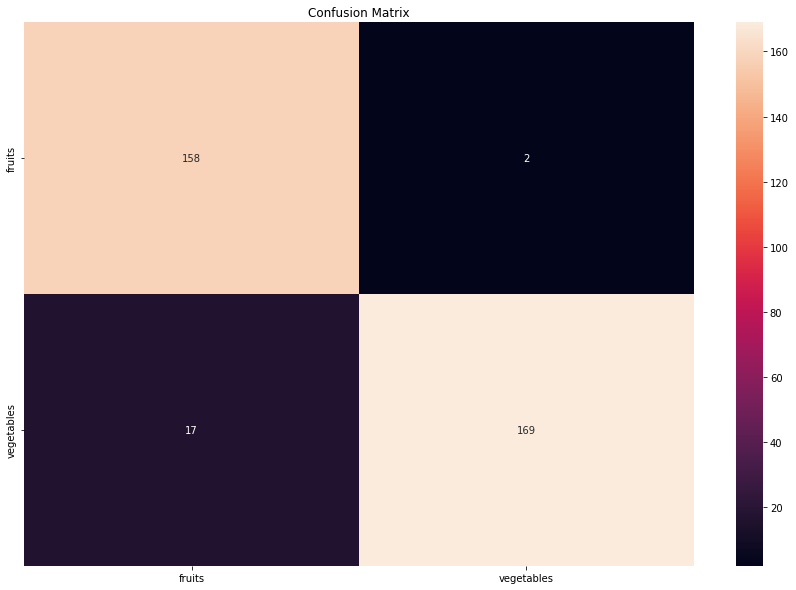

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

labels=os.listdir(PATH_DATASET_PREPROCESSED_BINARY)
labels = sorted(set(labels))

# Predict the label of the test_images
pred = model_4_Inception.predict(test_set)
#pred = np.argmax(pred,axis=1)
pred[pred <= 0.5] = 0
pred[pred > 0.5] = 1
pred = pred[:,0]

cf_matrix = confusion_matrix(test_labels, pred, normalize=None)
plt.figure(figsize = (15,10))
sns.heatmap(cf_matrix, 
            annot=True, 
            xticklabels = sorted(set(labels)), 
            yticklabels = sorted(set(labels)),
            fmt = "d"
            )

plt.title('Confusion Matrix')
plt.show()

####Fine-Tuning

In [ ]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'conv2d_93':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

conv_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_9[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [ ]:
dir_name = PATH_HOME + "/models"
if not os.path.exists(dir_name):
  os.makedirs(dir_name)
save_path = os.path.join(dir_name,'')
callbacks_list = [
                  keras.callbacks.ModelCheckpoint(
                      filepath=save_path,
                      monitor="val_loss",
                BinaryClassifier_Model4_InceptionV3_Fine_tuning.h5      verbose=1,
                      save_best_only=True)

                  ]
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10)

In [ ]:
history = model_4_Inception.fit(
      training_set,
      labels_set,
      epochs=50, 
      callbacks = [earlyStopping, callbacks_list],
      batch_size = BATCH_SIZE,
      validation_split = 0.1
)

Epoch 1/50
88/88 [==============================] - ETA: 0s - loss: 0.7975 - accuracy: 0.9167
Epoch 00001: val_loss improved from inf to 0.46370, saving model to /content/drive/Shareddrives/CIDL//models/BinaryClassifier_Model4_InceptionV3_Fine_tuning.h5
88/88 [==============================] - 20s 224ms/step - loss: 0.7975 - accuracy: 0.9167 - val_loss: 0.4637 - val_accuracy: 0.9425
Epoch 2/50
88/88 [==============================] - ETA: 0s - loss: 0.4569 - accuracy: 0.9302
Epoch 00002: val_loss improved from 0.46370 to 0.25209, saving model to /content/drive/Shareddrives/CIDL//models/BinaryClassifier_Model4_InceptionV3_Fine_tuning.h5
88/88 [==============================] - 21s 236ms/step - loss: 0.4569 - accuracy: 0.9302 - val_loss: 0.2521 - val_accuracy: 0.9489
Epoch 3/50
88/88 [==============================] - ETA: 0s - loss: 0.7604 - accuracy: 0.9270
Epoch 00003: val_loss did not improve from 0.25209
88/88 [==============================] - 18s 208ms/step - loss: 0.7604 - accura

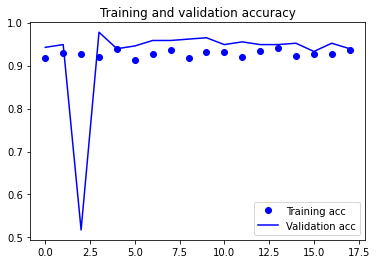

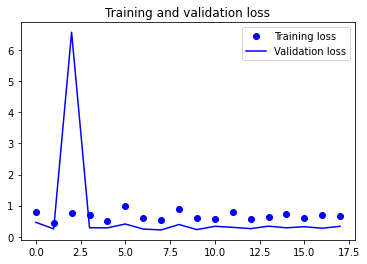

In [ ]:
import matplotlib.pyplot as plt

acc_1 = history.history['accuracy']
val_acc_1 = history.history['val_accuracy']
loss_1 = history.history['loss']
val_loss_1 = history.history['val_loss']

epochs = range(len(acc_1))

plt.plot(epochs, acc_1, 'bo', label='Training acc')
plt.plot(epochs, val_acc_1, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss_1, 'bo', label='Training loss')
plt.plot(epochs, val_loss_1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model_4_Inception.evaluate(test_set, test_labels)
test_acc

11/11 [==============================] - 2s 170ms/step - loss: 0.3396 - accuracy: 0.9566


0.9566473960876465

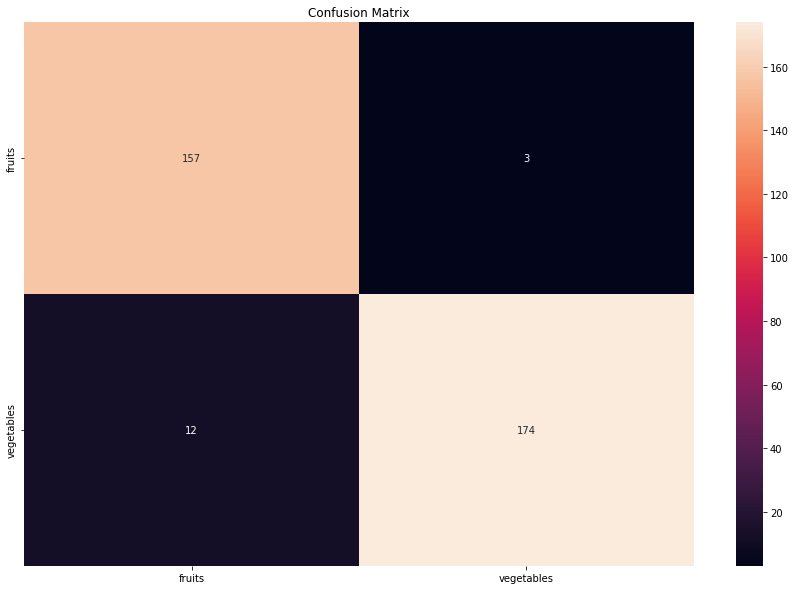

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

labels=os.listdir(PATH_DATASET_PREPROCESSED_BINARY)
labels = sorted(set(labels))

# Predict the label of the test_images
pred = model_4_Inception.predict(test_set)
#pred = np.argmax(pred,axis=1)
pred[pred <= 0.5] = 0
pred[pred > 0.5] = 1
pred = pred[:,0]

cf_matrix = confusion_matrix(test_labels, pred, normalize=None)
plt.figure(figsize = (15,10))
sns.heatmap(cf_matrix, 
            annot=True, 
            xticklabels = sorted(set(labels)), 
            yticklabels = sorted(set(labels)),
            fmt = "d"
            )

plt.title('Confusion Matrix')
plt.show()

##ResNet50


In [ ]:
from tensorflow.keras.applications import ResNet50

conv_base = keras.applications.resnet50.ResNet50(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3))

conv_base.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

###Model_1_Base

####Feature Extraction


In [ ]:
conv_base.trainable = False

In [ ]:
np.random.seed(123)
rn.seed(123)
tf.random.set_seed(123)

inputs = keras.Input(shape=(224, 224, 3))
x = keras.applications.resnet50.preprocess_input(inputs)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_1_ResNet = keras.Model(inputs, outputs)
model_1_ResNet.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
dir_name = PATH_HOME + "/models"
if not os.path.exists(dir_name):
  os.makedirs(dir_name)
save_path = os.path.join(dir_name,'BinaryClassifier_Model1_ResNet50_feature_extraction.h5')
callbacks_list = [
                  keras.callbacks.ModelCheckpoint(
                      filepath=save_path,
                      monitor="val_loss",
                      verbose=1,
                      save_best_only=True)

                  ]
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10)

In [ ]:
history = model_1_ResNet.fit(
      training_set,
      labels_set,
      epochs=50, 
      callbacks = [earlyStopping, callbacks_list],
      batch_size = BATCH_SIZE,
      validation_split = 0.1
)

Epoch 1/50
88/88 [==============================] - ETA: 0s - loss: 22.7492 - accuracy: 0.8836
Epoch 00001: val_loss improved from inf to 4.36142, saving model to /content/drive/Shareddrives/CIDL//models/BinaryClassifier_Model1_ResNet50_feature_extraction.h5


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


88/88 [==============================] - 32s 298ms/step - loss: 22.7492 - accuracy: 0.8836 - val_loss: 4.3614 - val_accuracy: 0.9489
Epoch 2/50
88/88 [==============================] - ETA: 0s - loss: 1.6343 - accuracy: 0.9619
Epoch 00002: val_loss improved from 4.36142 to 0.95144, saving model to /content/drive/Shareddrives/CIDL//models/BinaryClassifier_Model1_ResNet50_feature_extraction.h5
88/88 [==============================] - 25s 282ms/step - loss: 1.6343 - accuracy: 0.9619 - val_loss: 0.9514 - val_accuracy: 0.9712
Epoch 3/50
88/88 [==============================] - ETA: 0s - loss: 0.2912 - accuracy: 0.9797
Epoch 00003: val_loss improved from 0.95144 to 0.49129, saving model to /content/drive/Shareddrives/CIDL//models/BinaryClassifier_Model1_ResNet50_feature_extraction.h5
88/88 [==============================] - 25s 280ms/step - loss: 0.2912 - accuracy: 0.9797 - val_loss: 0.4913 - val_accuracy: 0.9681
Epoch 4/50
88/88 [==============================] - ETA: 0s - loss: 0.2066 - ac

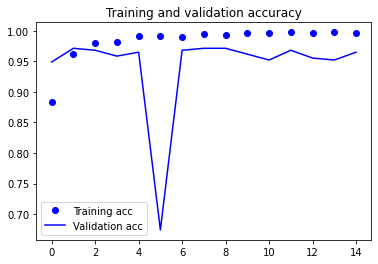

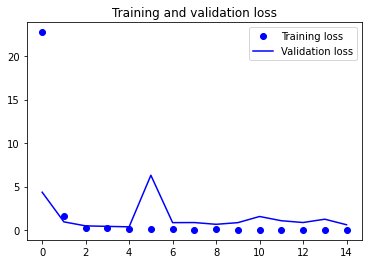

In [ ]:
import matplotlib.pyplot as plt

acc_1 = history.history['accuracy']
val_acc_1 = history.history['val_accuracy']
loss_1 = history.history['loss']
val_loss_1 = history.history['val_loss']

epochs = range(len(acc_1))

plt.plot(epochs, acc_1, 'bo', label='Training acc')
plt.plot(epochs, val_acc_1, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss_1, 'bo', label='Training loss')
plt.plot(epochs, val_loss_1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model_1_ResNet.evaluate(test_set, test_labels)
test_acc

11/11 [==============================] - 2s 207ms/step - loss: 1.5888 - accuracy: 0.9624


0.9624277353286743

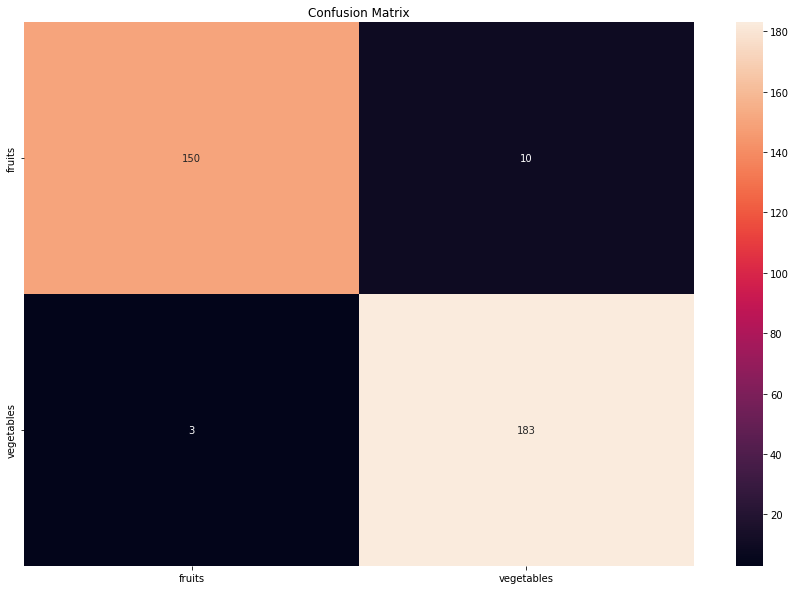

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

labels=os.listdir(PATH_DATASET_PREPROCESSED_BINARY)
labels = sorted(set(labels))

# Predict the label of the test_images
pred = model_1_ResNet.predict(test_set)
#pred = np.argmax(pred,axis=1)
pred[pred <= 0.5] = 0
pred[pred > 0.5] = 1
pred = pred[:,0]

cf_matrix = confusion_matrix(test_labels, pred, normalize=None)
plt.figure(figsize = (15,10))
sns.heatmap(cf_matrix, 
            annot=True, 
            xticklabels = sorted(set(labels)), 
            yticklabels = sorted(set(labels)),
            fmt = "d"
            )

plt.title('Confusion Matrix')
plt.show()

####Fine-Tuning

In [ ]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'conv5_block3_3_conv ':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

conv_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_15[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
dir_name = PATH_HOME + "/models"
if not os.path.exists(dir_name):
  os.makedirs(dir_name)
save_path = os.path.join(dir_name,'BinaryClassifier_Model1_ResNet50_Fine_tuning.h5')
callbacks_list = [
                  keras.callbacks.ModelCheckpoint(
                      filepath=save_path,
                      monitor="val_loss",
                      verbose=1,
                      save_best_only=True)

                  ]
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10)

In [ ]:
history = model_1_ResNet.fit(
      training_set,
      labels_set,
      epochs=50, 
      callbacks = [earlyStopping, callbacks_list],
      batch_size = BATCH_SIZE,
      validation_split = 0.1
)

Epoch 1/50
88/88 [==============================] - ETA: 0s - loss: 3.3895e-05 - accuracy: 1.0000
Epoch 00001: val_loss improved from inf to 0.98052, saving model to /content/drive/Shareddrives/CIDL//models/BinaryClassifier_Model1_ResNet50_Fine_tuning.h5


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


88/88 [==============================] - 23s 260ms/step - loss: 3.3895e-05 - accuracy: 1.0000 - val_loss: 0.9805 - val_accuracy: 0.9649
Epoch 2/50
88/88 [==============================] - ETA: 0s - loss: 5.5882e-10 - accuracy: 1.0000
Epoch 00002: val_loss improved from 0.98052 to 0.97611, saving model to /content/drive/Shareddrives/CIDL//models/BinaryClassifier_Model1_ResNet50_Fine_tuning.h5
88/88 [==============================] - 25s 281ms/step - loss: 5.5882e-10 - accuracy: 1.0000 - val_loss: 0.9761 - val_accuracy: 0.9649
Epoch 3/50
88/88 [==============================] - ETA: 0s - loss: 2.7814e-10 - accuracy: 1.0000
Epoch 00003: val_loss improved from 0.97611 to 0.95377, saving model to /content/drive/Shareddrives/CIDL//models/BinaryClassifier_Model1_ResNet50_Fine_tuning.h5
88/88 [==============================] - 25s 281ms/step - loss: 2.7814e-10 - accuracy: 1.0000 - val_loss: 0.9538 - val_accuracy: 0.9649
Epoch 4/50
88/88 [==============================] - ETA: 0s - loss: 3.4783

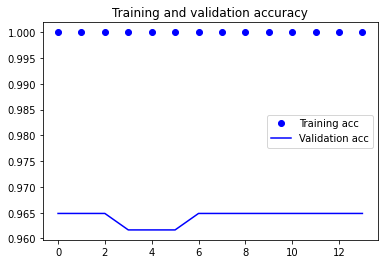

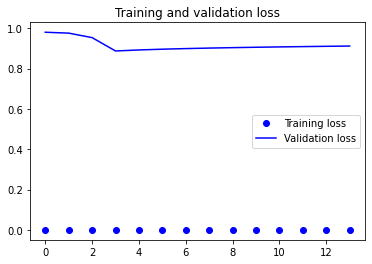

In [ ]:
import matplotlib.pyplot as plt

acc_1 = history.history['accuracy']
val_acc_1 = history.history['val_accuracy']
loss_1 = history.history['loss']
val_loss_1 = history.history['val_loss']

epochs = range(len(acc_1))

plt.plot(epochs, acc_1, 'bo', label='Training acc')
plt.plot(epochs, val_acc_1, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss_1, 'bo', label='Training loss')
plt.plot(epochs, val_loss_1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model_1_ResNet.evaluate(test_set, test_labels)
test_acc

11/11 [==============================] - 2s 206ms/step - loss: 1.4809 - accuracy: 0.9682


0.9682080745697021

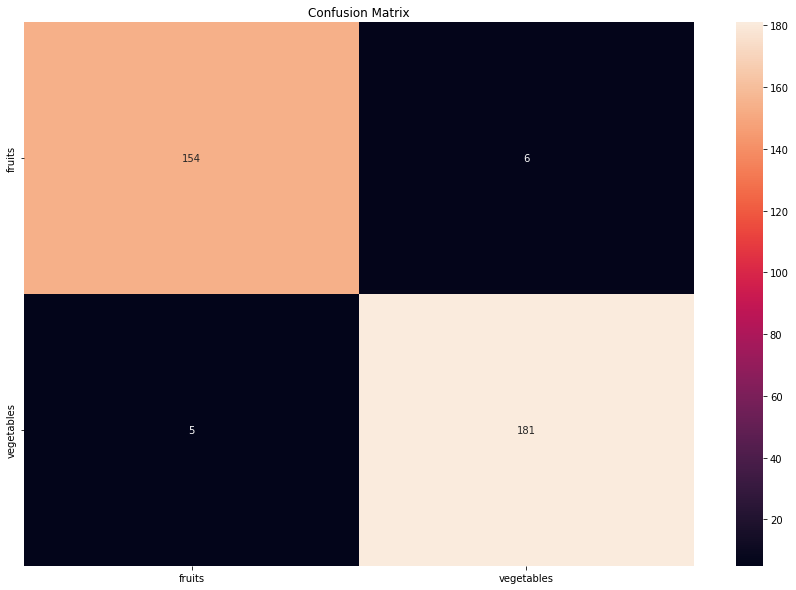

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

labels=os.listdir(PATH_DATASET_PREPROCESSED_BINARY)
labels = sorted(set(labels))

# Predict the label of the test_images
pred = model_1_ResNet.predict(test_set)
#pred = np.argmax(pred,axis=1)
pred[pred <= 0.5] = 0
pred[pred > 0.5] = 1
pred = pred[:,0]

cf_matrix = confusion_matrix(test_labels, pred, normalize=None)
plt.figure(figsize = (15,10))
sns.heatmap(cf_matrix, 
            annot=True, 
            xticklabels = sorted(set(labels)), 
            yticklabels = sorted(set(labels)),
            fmt = "d"
            )

plt.title('Confusion Matrix')
plt.show()

###Model_2_Aug

####Feature Extraction


In [ ]:
conv_base.trainable = False

In [ ]:
np.random.seed(123)
rn.seed(123)
tf.random.set_seed(123)

inputs = keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = keras.applications.resnet50.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2_ResNet = keras.Model(inputs, outputs)
model_2_ResNet.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
dir_name = PATH_HOME + "/models"
if not os.path.exists(dir_name):
  os.makedirs(dir_name)
save_path = os.path.join(dir_name,'BinaryClassifier_Model2_ResNet50_feature_extraction.h5')
callbacks_list = [
                  keras.callbacks.ModelCheckpoint(
                      filepath=save_path,
                      monitor="val_loss",
                      verbose=1,
                      save_best_only=True)

                  ]
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10)

In [ ]:
history = model_2_ResNet.fit(
      training_set,
      labels_set,
      epochs=50, 
      callbacks = [earlyStopping, callbacks_list],
      batch_size = BATCH_SIZE,
      validation_split = 0.1
)

Epoch 1/50
88/88 [==============================] - ETA: 0s - loss: 26.4824 - accuracy: 0.8548
Epoch 00001: val_loss improved from inf to 3.55537, saving model to /content/drive/Shareddrives/CIDL//models/BinaryClassifier_Model2_ResNet50_feature_extraction.h5


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


88/88 [==============================] - 32s 309ms/step - loss: 26.4824 - accuracy: 0.8548 - val_loss: 3.5554 - val_accuracy: 0.9489
Epoch 2/50
88/88 [==============================] - ETA: 0s - loss: 3.4376 - accuracy: 0.9327
Epoch 00002: val_loss improved from 3.55537 to 3.52097, saving model to /content/drive/Shareddrives/CIDL//models/BinaryClassifier_Model2_ResNet50_feature_extraction.h5
88/88 [==============================] - 27s 304ms/step - loss: 3.4376 - accuracy: 0.9327 - val_loss: 3.5210 - val_accuracy: 0.8914
Epoch 3/50
88/88 [==============================] - ETA: 0s - loss: 0.7949 - accuracy: 0.9320
Epoch 00003: val_loss improved from 3.52097 to 0.13672, saving model to /content/drive/Shareddrives/CIDL//models/BinaryClassifier_Model2_ResNet50_feature_extraction.h5
88/88 [==============================] - 27s 307ms/step - loss: 0.7949 - accuracy: 0.9320 - val_loss: 0.1367 - val_accuracy: 0.9553
Epoch 4/50
88/88 [==============================] - ETA: 0s - loss: 0.3857 - ac

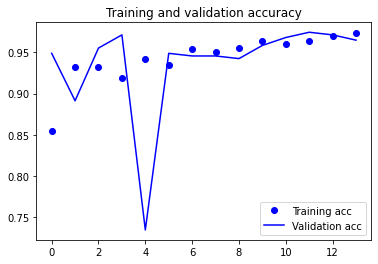

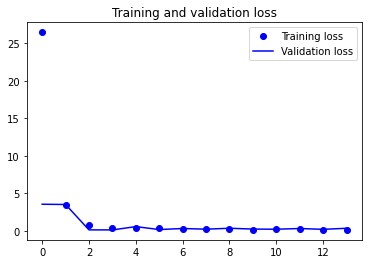

In [ ]:
import matplotlib.pyplot as plt

acc_1 = history.history['accuracy']
val_acc_1 = history.history['val_accuracy']
loss_1 = history.history['loss']
val_loss_1 = history.history['val_loss']

epochs = range(len(acc_1))

plt.plot(epochs, acc_1, 'bo', label='Training acc')
plt.plot(epochs, val_acc_1, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss_1, 'bo', label='Training loss')
plt.plot(epochs, val_loss_1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model_2_ResNet.evaluate(test_set, test_labels)
test_acc

11/11 [==============================] - 2s 208ms/step - loss: 0.6281 - accuracy: 0.9480


0.9479768872261047

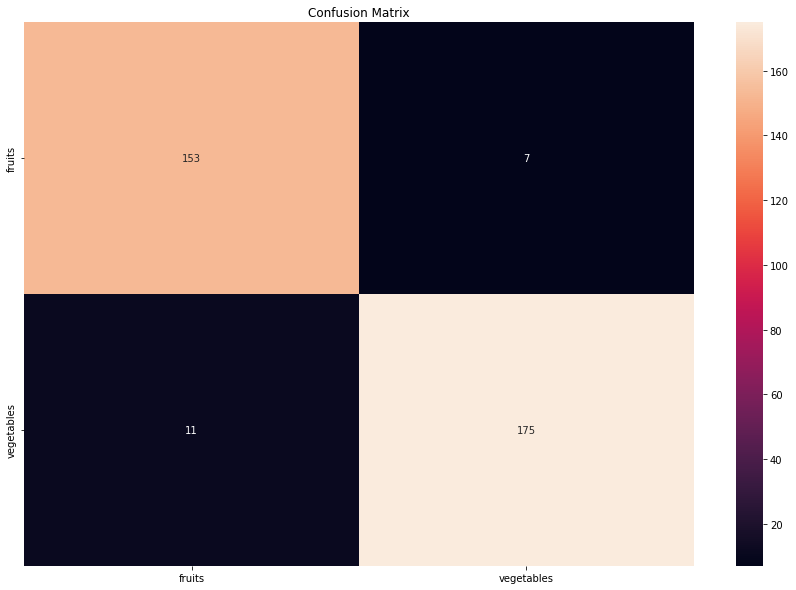

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

labels=os.listdir(PATH_DATASET_PREPROCESSED_BINARY)
labels = sorted(set(labels))

# Predict the label of the test_images
pred = model_2_ResNet.predict(test_set)
#pred = np.argmax(pred,axis=1)
pred[pred <= 0.5] = 0
pred[pred > 0.5] = 1
pred = pred[:,0]

cf_matrix = confusion_matrix(test_labels, pred, normalize=None)
plt.figure(figsize = (15,10))
sns.heatmap(cf_matrix, 
            annot=True, 
            xticklabels = sorted(set(labels)), 
            yticklabels = sorted(set(labels)),
            fmt = "d"
            )

plt.title('Confusion Matrix')
plt.show()

####Fine-Tuning

In [ ]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'conv5_block3_3_conv ':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

conv_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
dir_name = PATH_HOME + "/models"
if not os.path.exists(dir_name):
  os.makedirs(dir_name)
save_path = os.path.join(dir_name,'BinaryClassifier_Model2_ResNet50_Fine_tuning.h5')
callbacks_list = [
                  keras.callbacks.ModelCheckpoint(
                      filepath=save_path,
                      monitor="val_loss",
                      verbose=1,
                      save_best_only=True)

                  ]
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10)

In [ ]:
history = model_2_ResNet.fit(
      training_set,
      labels_set,
      epochs=50, 
      callbacks = [earlyStopping, callbacks_list],
      batch_size = BATCH_SIZE,
      validation_split = 0.1
)

Epoch 1/50
88/88 [==============================] - ETA: 0s - loss: 0.1735 - accuracy: 0.9683
Epoch 00001: val_loss improved from inf to 0.45512, saving model to /content/drive/Shareddrives/CIDL//models/BinaryClassifier_Model2_ResNet50_Fine_tuning.h5


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


88/88 [==============================] - 26s 296ms/step - loss: 0.1735 - accuracy: 0.9683 - val_loss: 0.4551 - val_accuracy: 0.9585
Epoch 2/50
88/88 [==============================] - ETA: 0s - loss: 0.1198 - accuracy: 0.9783
Epoch 00002: val_loss did not improve from 0.45512
88/88 [==============================] - 24s 271ms/step - loss: 0.1198 - accuracy: 0.9783 - val_loss: 0.5739 - val_accuracy: 0.9649
Epoch 3/50
88/88 [==============================] - ETA: 0s - loss: 0.2250 - accuracy: 0.9690
Epoch 00003: val_loss improved from 0.45512 to 0.21259, saving model to /content/drive/Shareddrives/CIDL//models/BinaryClassifier_Model2_ResNet50_Fine_tuning.h5
88/88 [==============================] - 27s 309ms/step - loss: 0.2250 - accuracy: 0.9690 - val_loss: 0.2126 - val_accuracy: 0.9681
Epoch 4/50
88/88 [==============================] - ETA: 0s - loss: 0.1726 - accuracy: 0.9737
Epoch 00004: val_loss did not improve from 0.21259
88/88 [==============================] - 24s 272ms/step - l

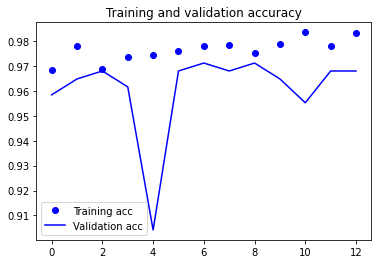

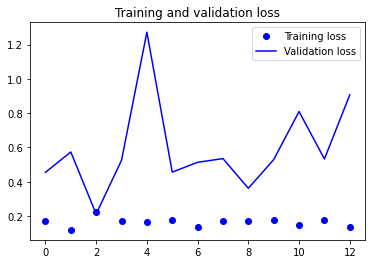

In [ ]:
import matplotlib.pyplot as plt

acc_1 = history.history['accuracy']
val_acc_1 = history.history['val_accuracy']
loss_1 = history.history['loss']
val_loss_1 = history.history['val_loss']

epochs = range(len(acc_1))

plt.plot(epochs, acc_1, 'bo', label='Training acc')
plt.plot(epochs, val_acc_1, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss_1, 'bo', label='Training loss')
plt.plot(epochs, val_loss_1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model_2_ResNet.evaluate(test_set, test_labels)
test_acc

11/11 [==============================] - 2s 210ms/step - loss: 0.8978 - accuracy: 0.9653


0.9653179049491882

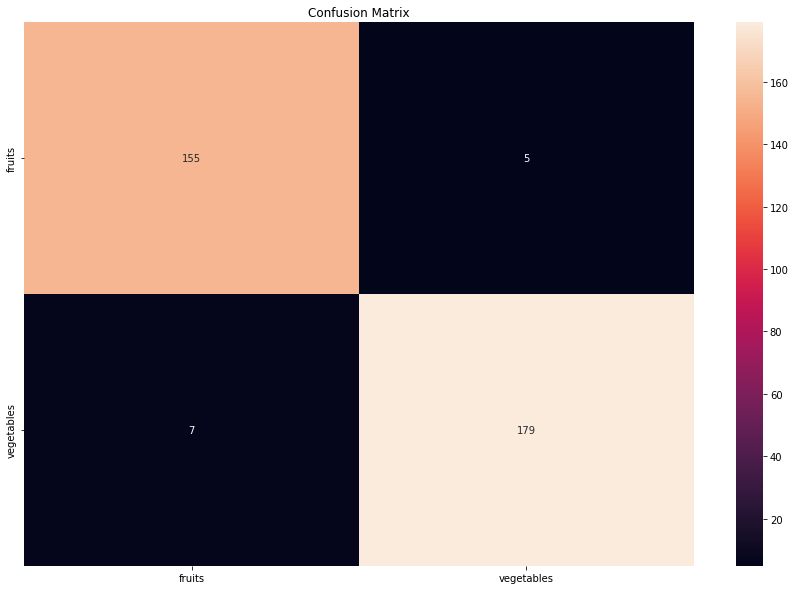

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

labels=os.listdir(PATH_DATASET_PREPROCESSED_BINARY)
labels = sorted(set(labels))

# Predict the label of the test_images
pred = model_2_ResNet.predict(test_set)
#pred = np.argmax(pred,axis=1)
pred[pred <= 0.5] = 0
pred[pred > 0.5] = 1
pred = pred[:,0]

cf_matrix = confusion_matrix(test_labels, pred, normalize=None)
plt.figure(figsize = (15,10))
sns.heatmap(cf_matrix, 
            annot=True, 
            xticklabels = sorted(set(labels)), 
            yticklabels = sorted(set(labels)),
            fmt = "d"
            )

plt.title('Confusion Matrix')
plt.show()

###Model_3a_Drop0.2

####Feature Extraction


In [ ]:
conv_base.trainable = False

In [ ]:
np.random.seed(123)
rn.seed(123)
tf.random.set_seed(123)

inputs = keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = keras.applications.resnet50.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3a_ResNet = keras.Model(inputs, outputs)
model_3a_ResNet.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
dir_name = PATH_HOME + "/models"
if not os.path.exists(dir_name):
  os.makedirs(dir_name)
save_path = os.path.join(dir_name,'BinaryClassifier_Model3a_ResNet50_feature_extraction.h5')
callbacks_list = [
                  keras.callbacks.ModelCheckpoint(
                      filepath=save_path,
                      monitor="val_loss",
                      verbose=1,
                      save_best_only=True)

                  ]
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10)

In [ ]:
history = model_3a_ResNet.fit(
      training_set,
      labels_set,
      epochs=50, 
      callbacks = [earlyStopping, callbacks_list],
      batch_size = BATCH_SIZE,
      validation_split = 0.1
)

Epoch 1/50
88/88 [==============================] - ETA: 0s - loss: 28.3689 - accuracy: 0.8495
Epoch 00001: val_loss improved from inf to 4.45344, saving model to /content/drive/Shareddrives/CIDL//models/BinaryClassifier_Model3a_ResNet50_feature_extraction.h5


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


88/88 [==============================] - 42s 333ms/step - loss: 28.3689 - accuracy: 0.8495 - val_loss: 4.4534 - val_accuracy: 0.9521
Epoch 2/50
88/88 [==============================] - ETA: 0s - loss: 6.9886 - accuracy: 0.9164
Epoch 00002: val_loss improved from 4.45344 to 2.19177, saving model to /content/drive/Shareddrives/CIDL//models/BinaryClassifier_Model3a_ResNet50_feature_extraction.h5
88/88 [==============================] - 27s 306ms/step - loss: 6.9886 - accuracy: 0.9164 - val_loss: 2.1918 - val_accuracy: 0.9617
Epoch 3/50
88/88 [==============================] - ETA: 0s - loss: 4.1500 - accuracy: 0.9342
Epoch 00003: val_loss did not improve from 2.19177
88/88 [==============================] - 24s 271ms/step - loss: 4.1500 - accuracy: 0.9342 - val_loss: 3.6346 - val_accuracy: 0.9489
Epoch 4/50
88/88 [==============================] - ETA: 0s - loss: 2.8138 - accuracy: 0.9445
Epoch 00004: val_loss did not improve from 2.19177
88/88 [==============================] - 24s 271ms

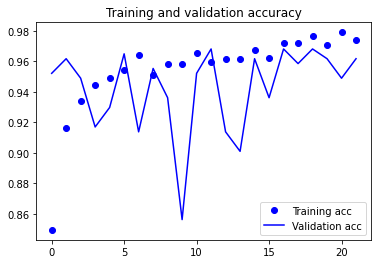

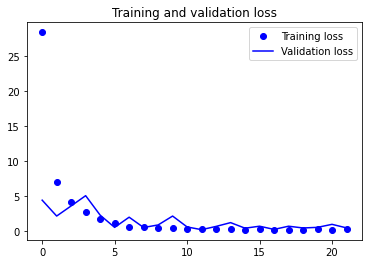

In [ ]:
import matplotlib.pyplot as plt

acc_1 = history.history['accuracy']
val_acc_1 = history.history['val_accuracy']
loss_1 = history.history['loss']
val_loss_1 = history.history['val_loss']

epochs = range(len(acc_1))

plt.plot(epochs, acc_1, 'bo', label='Training acc')
plt.plot(epochs, val_acc_1, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss_1, 'bo', label='Training loss')
plt.plot(epochs, val_loss_1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model_3a_ResNet.evaluate(test_set, test_labels)
test_acc

11/11 [==============================] - 2s 207ms/step - loss: 0.7059 - accuracy: 0.9451


0.9450867176055908

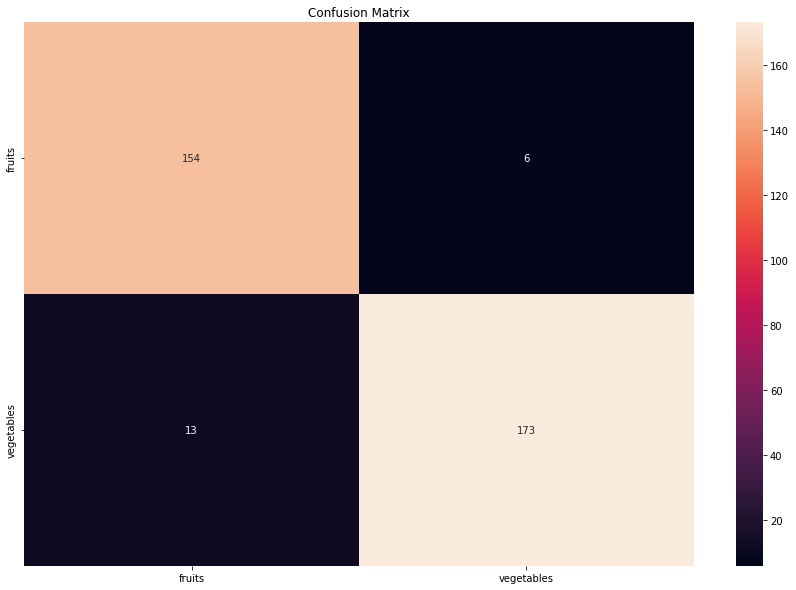

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

labels=os.listdir(PATH_DATASET_PREPROCESSED_BINARY)
labels = sorted(set(labels))

# Predict the label of the test_images
pred = model_3a_ResNet.predict(test_set)
#pred = np.argmax(pred,axis=1)
pred[pred <= 0.5] = 0
pred[pred > 0.5] = 1
pred = pred[:,0]

cf_matrix = confusion_matrix(test_labels, pred, normalize=None)
plt.figure(figsize = (15,10))
sns.heatmap(cf_matrix, 
            annot=True, 
            xticklabels = sorted(set(labels)), 
            yticklabels = sorted(set(labels)),
            fmt = "d"
            )

plt.title('Confusion Matrix')
plt.show()

####Fine-Tuning

In [ ]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'conv5_block3_3_conv ':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

conv_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
dir_name = PATH_HOME + "/models"
if not os.path.exists(dir_name):
  os.makedirs(dir_name)
save_path = os.path.join(dir_name,'BinaryClassifier_Model3a_ResNet50_Fine_tuning.h5')
callbacks_list = [
                  keras.callbacks.ModelCheckpoint(
                      filepath=save_path,
                      monitor="val_loss",
                      verbose=1,
                      save_best_only=True)

                  ]
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10)

In [ ]:
history = model_3a_ResNet.fit(
      training_set,
      labels_set,
      epochs=50, 
      callbacks = [earlyStopping, callbacks_list],
      batch_size = BATCH_SIZE,
      validation_split = 0.1
)

Epoch 1/50
88/88 [==============================] - ETA: 0s - loss: 0.2567 - accuracy: 0.9765
Epoch 00001: val_loss improved from inf to 0.75205, saving model to /content/drive/Shareddrives/CIDL//models/BinaryClassifier_Model3a_ResNet50_Fine_tuning.h5


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


88/88 [==============================] - 26s 291ms/step - loss: 0.2567 - accuracy: 0.9765 - val_loss: 0.7520 - val_accuracy: 0.9585
Epoch 2/50
88/88 [==============================] - ETA: 0s - loss: 0.3663 - accuracy: 0.9715
Epoch 00002: val_loss improved from 0.75205 to 0.41787, saving model to /content/drive/Shareddrives/CIDL//models/BinaryClassifier_Model3a_ResNet50_Fine_tuning.h5
88/88 [==============================] - 27s 306ms/step - loss: 0.3663 - accuracy: 0.9715 - val_loss: 0.4179 - val_accuracy: 0.9744
Epoch 3/50
88/88 [==============================] - ETA: 0s - loss: 0.1902 - accuracy: 0.9804
Epoch 00003: val_loss did not improve from 0.41787
88/88 [==============================] - 24s 272ms/step - loss: 0.1902 - accuracy: 0.9804 - val_loss: 0.4628 - val_accuracy: 0.9808
Epoch 4/50
88/88 [==============================] - ETA: 0s - loss: 0.3294 - accuracy: 0.9744
Epoch 00004: val_loss did not improve from 0.41787
88/88 [==============================] - 24s 270ms/step - 

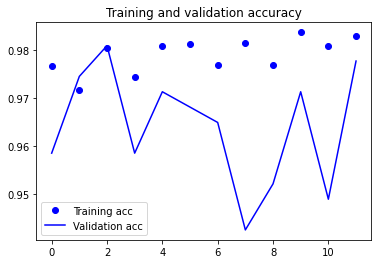

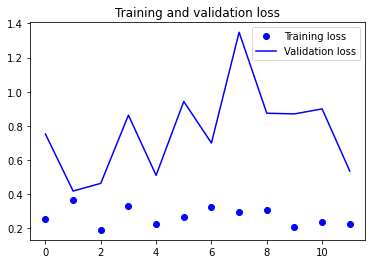

In [ ]:
import matplotlib.pyplot as plt

acc_1 = history.history['accuracy']
val_acc_1 = history.history['val_accuracy']
loss_1 = history.history['loss']
val_loss_1 = history.history['val_loss']

epochs = range(len(acc_1))

plt.plot(epochs, acc_1, 'bo', label='Training acc')
plt.plot(epochs, val_acc_1, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss_1, 'bo', label='Training loss')
plt.plot(epochs, val_loss_1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model_3a_ResNet.evaluate(test_set, test_labels)
test_acc

11/11 [==============================] - 2s 208ms/step - loss: 0.8110 - accuracy: 0.9624


0.9624277353286743

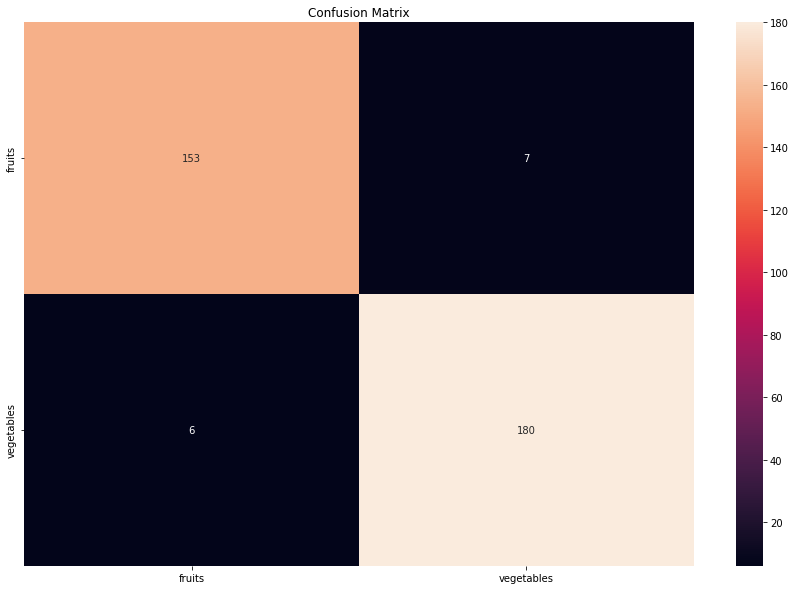

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

labels=os.listdir(PATH_DATASET_PREPROCESSED_BINARY)
labels = sorted(set(labels))

# Predict the label of the test_images
pred = model_3a_ResNet.predict(test_set)
#pred = np.argmax(pred,axis=1)
pred[pred <= 0.5] = 0
pred[pred > 0.5] = 1
pred = pred[:,0]

cf_matrix = confusion_matrix(test_labels, pred, normalize=None)
plt.figure(figsize = (15,10))
sns.heatmap(cf_matrix, 
            annot=True, 
            xticklabels = sorted(set(labels)), 
            yticklabels = sorted(set(labels)),
            fmt = "d"
            )

plt.title('Confusion Matrix')
plt.show()

###Model_3b_Drop0.5

####Feature Extraction


In [ ]:
conv_base.trainable = False

In [ ]:
np.random.seed(123)
rn.seed(123)
tf.random.set_seed(123)

inputs = keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = keras.applications.resnet50.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3b_ResNet = keras.Model(inputs, outputs)
model_3b_ResNet.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
dir_name = PATH_HOME + "/models"
if not os.path.exists(dir_name):
  os.makedirs(dir_name)
save_path = os.path.join(dir_name,'BinaryClassifier_Model3b_ResNet50_feature_extraction.h5')
callbacks_list = [
                  keras.callbacks.ModelCheckpoint(
                      filepath=save_path,
                      monitor="val_loss",
                      verbose=1,
                      save_best_only=True)

                  ]
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10)

In [ ]:
history = model_3b_ResNet.fit(
      training_set,
      labels_set,
      epochs=50, 
      callbacks = [earlyStopping, callbacks_list],
      batch_size = BATCH_SIZE,
      validation_split = 0.1
)

Epoch 1/50
88/88 [==============================] - ETA: 0s - loss: 22.1584 - accuracy: 0.8623
Epoch 00001: val_loss improved from inf to 5.68450, saving model to /content/drive/Shareddrives/CIDL//models/BinaryClassifier_Model3b_ResNet50_feature_extraction.h5


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


88/88 [==============================] - 31s 307ms/step - loss: 22.1584 - accuracy: 0.8623 - val_loss: 5.6845 - val_accuracy: 0.9489
Epoch 2/50
88/88 [==============================] - ETA: 0s - loss: 9.3817 - accuracy: 0.9149
Epoch 00002: val_loss did not improve from 5.68450
88/88 [==============================] - 24s 270ms/step - loss: 9.3817 - accuracy: 0.9149 - val_loss: 9.4902 - val_accuracy: 0.8978
Epoch 3/50
88/88 [==============================] - ETA: 0s - loss: 6.7541 - accuracy: 0.9288
Epoch 00003: val_loss did not improve from 5.68450
88/88 [==============================] - 24s 270ms/step - loss: 6.7541 - accuracy: 0.9288 - val_loss: 8.1770 - val_accuracy: 0.9489
Epoch 4/50
88/88 [==============================] - ETA: 0s - loss: 4.9571 - accuracy: 0.9409
Epoch 00004: val_loss improved from 5.68450 to 5.39057, saving model to /content/drive/Shareddrives/CIDL//models/BinaryClassifier_Model3b_ResNet50_feature_extraction.h5
88/88 [==============================] - 27s 308ms

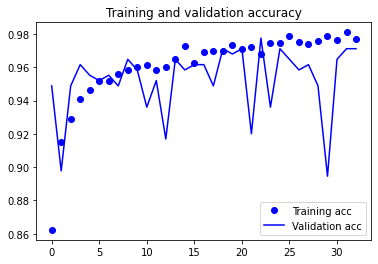

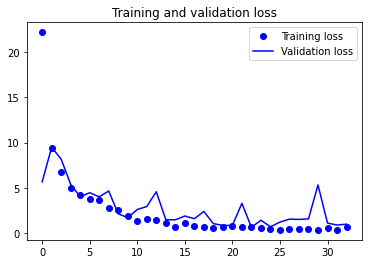

In [ ]:
import matplotlib.pyplot as plt

acc_1 = history.history['accuracy']
val_acc_1 = history.history['val_accuracy']
loss_1 = history.history['loss']
val_loss_1 = history.history['val_loss']

epochs = range(len(acc_1))

plt.plot(epochs, acc_1, 'bo', label='Training acc')
plt.plot(epochs, val_acc_1, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss_1, 'bo', label='Training loss')
plt.plot(epochs, val_loss_1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model_3b_ResNet.evaluate(test_set, test_labels)
test_acc

11/11 [==============================] - 2s 208ms/step - loss: 2.1387 - accuracy: 0.9509


0.9508670568466187

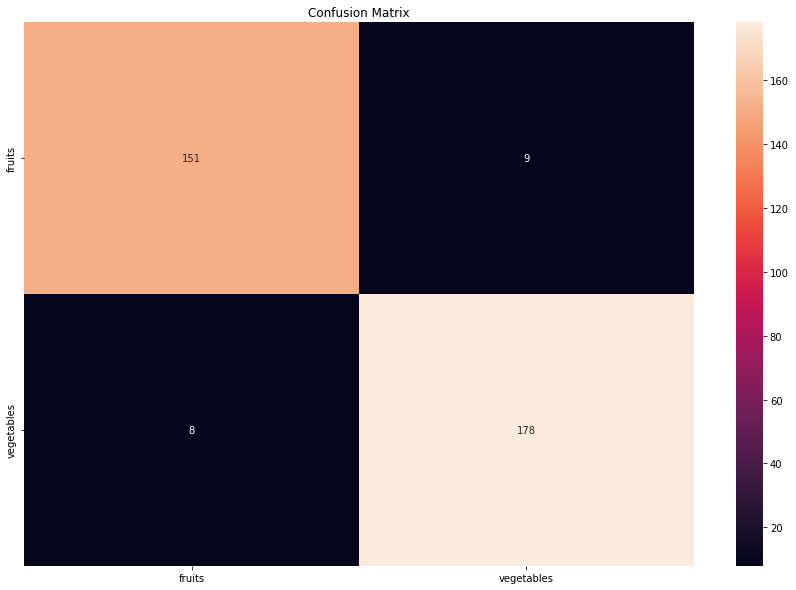

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

labels=os.listdir(PATH_DATASET_PREPROCESSED_BINARY)
labels = sorted(set(labels))

# Predict the label of the test_images
pred = model_3b_ResNet.predict(test_set)
#pred = np.argmax(pred,axis=1)
pred[pred <= 0.5] = 0
pred[pred > 0.5] = 1
pred = pred[:,0]

cf_matrix = confusion_matrix(test_labels, pred, normalize=None)
plt.figure(figsize = (15,10))
sns.heatmap(cf_matrix, 
            annot=True, 
            xticklabels = sorted(set(labels)), 
            yticklabels = sorted(set(labels)),
            fmt = "d"
            )

plt.title('Confusion Matrix')
plt.show()

####Fine-Tuning

In [ ]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'conv5_block3_3_conv ':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

conv_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
dir_name = PATH_HOME + "/models"
if not os.path.exists(dir_name):
  os.makedirs(dir_name)
save_path = os.path.join(dir_name,'BinaryClassifier_Model3b_ResNet50_Fine_tuning.h5')
callbacks_list = [
                  keras.callbacks.ModelCheckpoint(
                      filepath=save_path,
                      monitor="val_loss",
                      verbose=1,
                      save_best_only=True)

                  ]
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10)

In [ ]:
history = model_3b_ResNet.fit(
      training_set,
      labels_set,
      epochs=50, 
      callbacks = [earlyStopping, callbacks_list],
      batch_size = BATCH_SIZE,
      validation_split = 0.1
)

Epoch 1/50
88/88 [==============================] - ETA: 0s - loss: 0.6539 - accuracy: 0.9737
Epoch 00001: val_loss improved from inf to 1.45761, saving model to /content/drive/Shareddrives/CIDL//models/BinaryClassifier_Model3b_ResNet50_Fine_tuning.h5


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


88/88 [==============================] - 26s 291ms/step - loss: 0.6539 - accuracy: 0.9737 - val_loss: 1.4576 - val_accuracy: 0.9681
Epoch 2/50
88/88 [==============================] - ETA: 0s - loss: 0.6858 - accuracy: 0.9719
Epoch 00002: val_loss improved from 1.45761 to 0.85426, saving model to /content/drive/Shareddrives/CIDL//models/BinaryClassifier_Model3b_ResNet50_Fine_tuning.h5
88/88 [==============================] - 27s 305ms/step - loss: 0.6858 - accuracy: 0.9719 - val_loss: 0.8543 - val_accuracy: 0.9744
Epoch 3/50
88/88 [==============================] - ETA: 0s - loss: 0.4907 - accuracy: 0.9779
Epoch 00003: val_loss did not improve from 0.85426
88/88 [==============================] - 25s 278ms/step - loss: 0.4907 - accuracy: 0.9779 - val_loss: 1.2166 - val_accuracy: 0.9712
Epoch 4/50
88/88 [==============================] - ETA: 0s - loss: 0.3831 - accuracy: 0.9833
Epoch 00004: val_loss did not improve from 0.85426
88/88 [==============================] - 24s 269ms/step - 

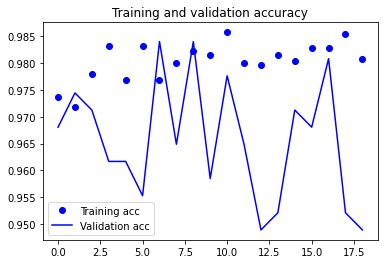

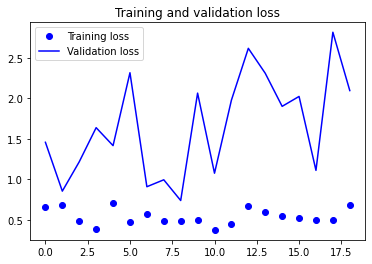

In [ ]:
import matplotlib.pyplot as plt

acc_1 = history.history['accuracy']
val_acc_1 = history.history['val_accuracy']
loss_1 = history.history['loss']
val_loss_1 = history.history['val_loss']

epochs = range(len(acc_1))

plt.plot(epochs, acc_1, 'bo', label='Training acc')
plt.plot(epochs, val_acc_1, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss_1, 'bo', label='Training loss')
plt.plot(epochs, val_loss_1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model_3b_ResNet.evaluate(test_set, test_labels)
test_acc

11/11 [==============================] - 2s 209ms/step - loss: 3.2924 - accuracy: 0.9451


0.9450867176055908

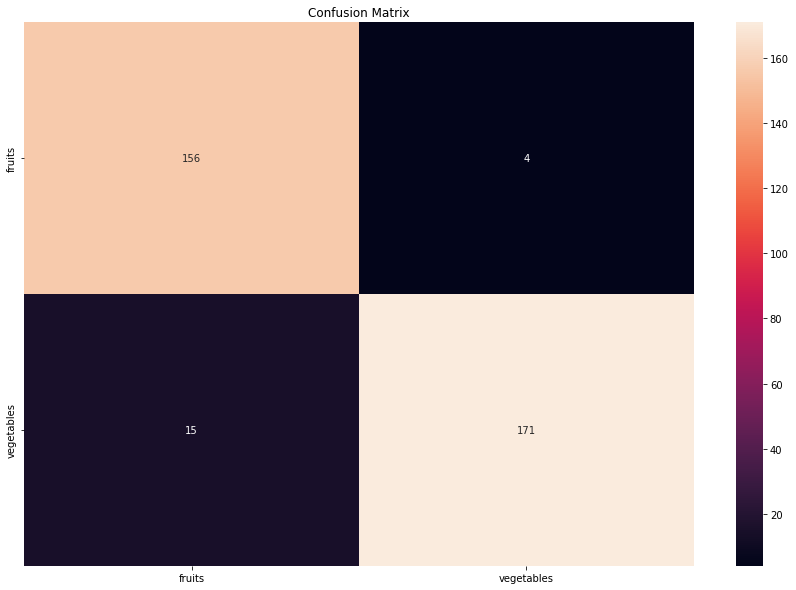

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

labels=os.listdir(PATH_DATASET_PREPROCESSED_BINARY)
labels = sorted(set(labels))

# Predict the label of the test_images
pred = model_3b_ResNet.predict(test_set)
#pred = np.argmax(pred,axis=1)
pred[pred <= 0.5] = 0
pred[pred > 0.5] = 1
pred = pred[:,0]

cf_matrix = confusion_matrix(test_labels, pred, normalize=None)
plt.figure(figsize = (15,10))
sns.heatmap(cf_matrix, 
            annot=True, 
            xticklabels = sorted(set(labels)), 
            yticklabels = sorted(set(labels)),
            fmt = "d"
            )

plt.title('Confusion Matrix')
plt.show()

###Model_4_RelL1L2

####Feature Extraction


In [ ]:
conv_base.trainable = False

In [ ]:
np.random.seed(123)
rn.seed(123)
tf.random.set_seed(123)

reg = regularizers.l1_l2(l1=1e-5, l2=1e-4)
inputs = keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = keras.applications.resnet50.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256, kernel_regularizer=reg)(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4_ResNet = keras.Model(inputs, outputs)
model_4_ResNet.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
dir_name = PATH_HOME + "/models"
if not os.path.exists(dir_name):
  os.makedirs(dir_name)
save_path = os.path.join(dir_name,'BinaryClassifier_Model4_ResNet50_feature_extraction.h5')
callbacks_list = [
                  keras.callbacks.ModelCheckpoint(
                      filepath=save_path,
                      monitor="val_loss",
                      verbose=1,
                      save_best_only=True)

                  ]
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10)

In [ ]:
history = model_4_ResNet.fit(
      training_set,
      labels_set,
      epochs=50, 
      callbacks = [earlyStopping, callbacks_list],
      batch_size = BATCH_SIZE,
      validation_split = 0.1
)

Epoch 1/50
88/88 [==============================] - ETA: 0s - loss: 27.7020 - accuracy: 0.8498
Epoch 00001: val_loss improved from inf to 6.14317, saving model to /content/drive/Shareddrives/CIDL//models/BinaryClassifier_Model4_ResNet50_feature_extraction.h5


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


88/88 [==============================] - 29s 181ms/step - loss: 27.7020 - accuracy: 0.8498 - val_loss: 6.1432 - val_accuracy: 0.9553
Epoch 2/50
88/88 [==============================] - ETA: 0s - loss: 8.4828 - accuracy: 0.9214
Epoch 00002: val_loss did not improve from 6.14317
88/88 [==============================] - 12s 138ms/step - loss: 8.4828 - accuracy: 0.9214 - val_loss: 6.1718 - val_accuracy: 0.9521
Epoch 3/50
88/88 [==============================] - ETA: 0s - loss: 6.6443 - accuracy: 0.9313
Epoch 00003: val_loss did not improve from 6.14317
88/88 [==============================] - 12s 139ms/step - loss: 6.6443 - accuracy: 0.9313 - val_loss: 15.5314 - val_accuracy: 0.8498
Epoch 4/50
88/88 [==============================] - ETA: 0s - loss: 3.9106 - accuracy: 0.9480
Epoch 00004: val_loss improved from 6.14317 to 3.16988, saving model to /content/drive/Shareddrives/CIDL//models/BinaryClassifier_Model4_ResNet50_feature_extraction.h5
88/88 [==============================] - 15s 168ms

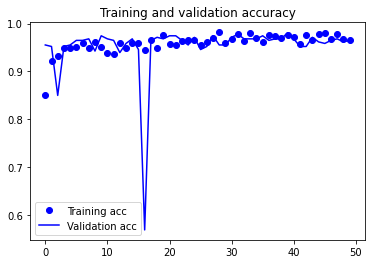

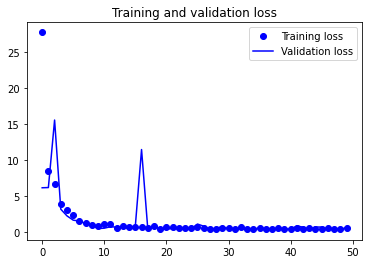

In [ ]:
import matplotlib.pyplot as plt

acc_1 = history.history['accuracy']
val_acc_1 = history.history['val_accuracy']
loss_1 = history.history['loss']
val_loss_1 = history.history['val_loss']

epochs = range(len(acc_1))

plt.plot(epochs, acc_1, 'bo', label='Training acc')
plt.plot(epochs, val_acc_1, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss_1, 'bo', label='Training loss')
plt.plot(epochs, val_loss_1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model_4_ResNet.evaluate(test_set, test_labels)
test_acc

11/11 [==============================] - 1s 101ms/step - loss: 0.8363 - accuracy: 0.9538


0.9537572264671326

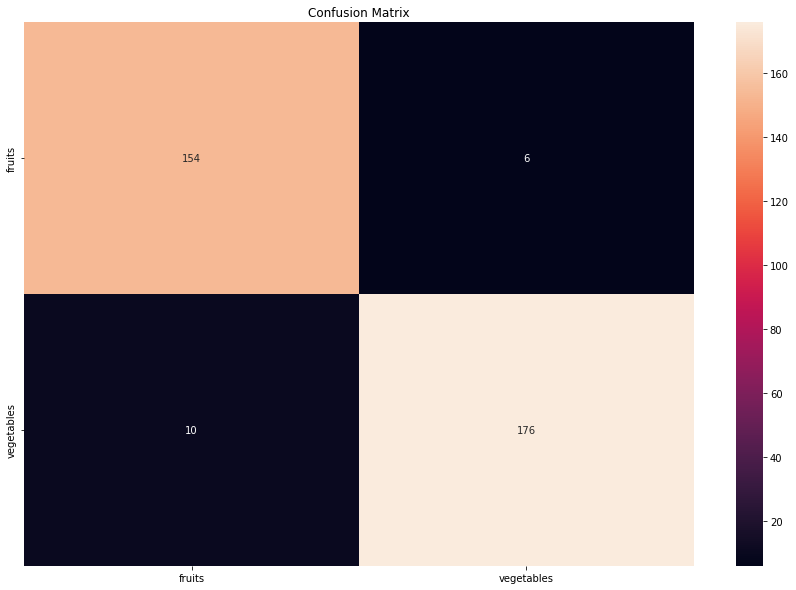

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

labels=os.listdir(PATH_DATASET_PREPROCESSED_BINARY)
labels = sorted(set(labels))

# Predict the label of the test_images
pred = model_4_ResNet.predict(test_set)
#pred = np.argmax(pred,axis=1)
pred[pred <= 0.5] = 0
pred[pred > 0.5] = 1
pred = pred[:,0]

cf_matrix = confusion_matrix(test_labels, pred, normalize=None)
plt.figure(figsize = (15,10))
sns.heatmap(cf_matrix, 
            annot=True, 
            xticklabels = sorted(set(labels)), 
            yticklabels = sorted(set(labels)),
            fmt = "d"
            )

plt.title('Confusion Matrix')
plt.show()

####Fine-Tuning

In [ ]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'conv5_block3_3_conv ':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

conv_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
dir_name = PATH_HOME + "/models"
if not os.path.exists(dir_name):
  os.makedirs(dir_name)
save_path = os.path.join(dir_name,'BinaryClassifier_Model4_ResNet50_Fine_tuning.h5')
callbacks_list = [
                  keras.callbacks.ModelCheckpoint(
                      filepath=save_path,
                      monitor="val_loss",
                      verbose=1,
                      save_best_only=True)

                  ]
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10)

In [ ]:
history = model_4_ResNet.fit(
      training_set,
      labels_set,
      epochs=50, 
      callbacks = [earlyStopping, callbacks_list],
      batch_size = BATCH_SIZE,
      validation_split = 0.1
)

Epoch 1/50
88/88 [==============================] - ETA: 0s - loss: 0.4386 - accuracy: 0.9744
Epoch 00001: val_loss improved from inf to 0.42205, saving model to /content/drive/Shareddrives/CIDL//models/BinaryClassifier_Model4_ResNet50_Fine_tuning.h5


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


88/88 [==============================] - 14s 162ms/step - loss: 0.4386 - accuracy: 0.9744 - val_loss: 0.4220 - val_accuracy: 0.9712
Epoch 2/50
88/88 [==============================] - ETA: 0s - loss: 0.3319 - accuracy: 0.9804
Epoch 00002: val_loss improved from 0.42205 to 0.31573, saving model to /content/drive/Shareddrives/CIDL//models/BinaryClassifier_Model4_ResNet50_Fine_tuning.h5
88/88 [==============================] - 14s 162ms/step - loss: 0.3319 - accuracy: 0.9804 - val_loss: 0.3157 - val_accuracy: 0.9776
Epoch 3/50
88/88 [==============================] - ETA: 0s - loss: 0.4397 - accuracy: 0.9715
Epoch 00003: val_loss did not improve from 0.31573
88/88 [==============================] - 13s 144ms/step - loss: 0.4397 - accuracy: 0.9715 - val_loss: 0.6070 - val_accuracy: 0.9649
Epoch 4/50
88/88 [==============================] - ETA: 0s - loss: 0.3636 - accuracy: 0.9769
Epoch 00004: val_loss did not improve from 0.31573
88/88 [==============================] - 12s 142ms/step - l

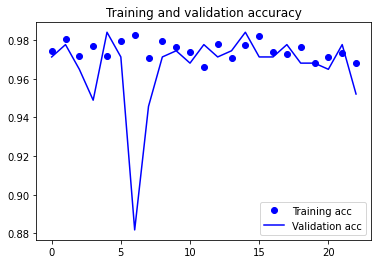

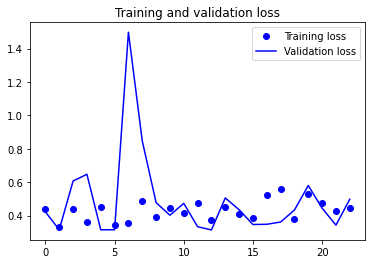

In [ ]:
import matplotlib.pyplot as plt

acc_1 = history.history['accuracy']
val_acc_1 = history.history['val_accuracy']
loss_1 = history.history['loss']
val_loss_1 = history.history['val_loss']

epochs = range(len(acc_1))

plt.plot(epochs, acc_1, 'bo', label='Training acc')
plt.plot(epochs, val_acc_1, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss_1, 'bo', label='Training loss')
plt.plot(epochs, val_loss_1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model_4_ResNet.evaluate(test_set, test_labels)
test_acc

11/11 [==============================] - 1s 102ms/step - loss: 0.8571 - accuracy: 0.9364


0.9364162087440491

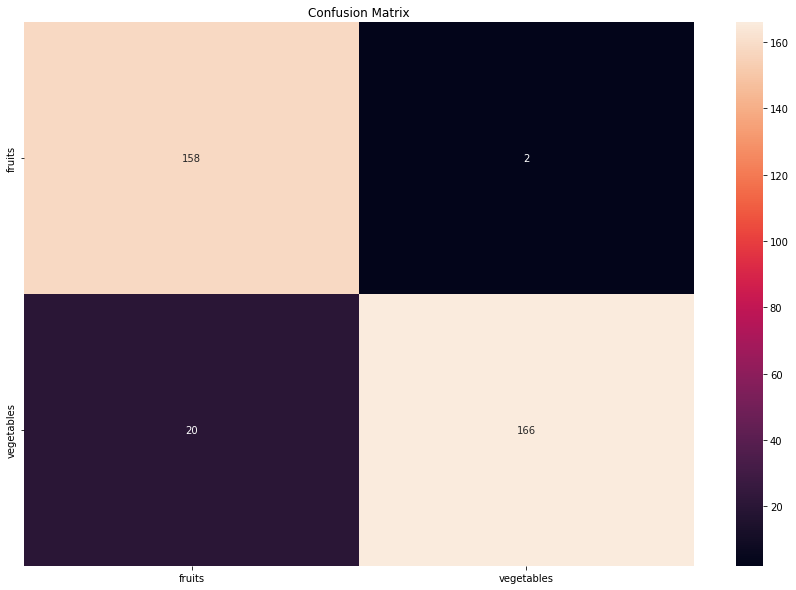

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

labels=os.listdir(PATH_DATASET_PREPROCESSED_BINARY)
labels = sorted(set(labels))

# Predict the label of the test_images
pred = model_4_ResNet.predict(test_set)
#pred = np.argmax(pred,axis=1)
pred[pred <= 0.5] = 0
pred[pred > 0.5] = 1
pred = pred[:,0]

cf_matrix = confusion_matrix(test_labels, pred, normalize=None)
plt.figure(figsize = (15,10))
sns.heatmap(cf_matrix, 
            annot=True, 
            xticklabels = sorted(set(labels)), 
            yticklabels = sorted(set(labels)),
            fmt = "d"
            )

plt.title('Confusion Matrix')
plt.show()

#Roc Curve

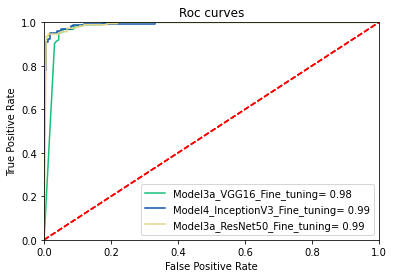

In [ ]:
dir = os.path.join(PATH_HOME, "models")
model_1 = keras.models.load_model(os.path.join(dir, "BinaryClassifier_Model3a_VGG16_Fine_tuning.h5"))
model_2 = keras.models.load_model(os.path.join(dir, "BinaryClassifier_Model4_InceptionV3_Fine_tuning.h5"))
model_3 = keras.models.load_model(os.path.join(dir, "BinaryClassifier_Model3a_ResNet50_Fine_tuning.h5"))
models =[model_1, model_2, model_3]
plotRocCurves(models, test_set, test_labels, ['Model3a_VGG16_Fine_tuning', 'Model4_InceptionV3_Fine_tuning', 'Model3a_ResNet50_Fine_tuning'])